In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
from tensorflow.keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
base_skin_dir = os.path.join('..', 'Data')
print(base_skin_dir)
print(os.path)
print(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

..\Data
<module 'ntpath' from 'c:\\Users\\dell\\AppData\\Local\\Programs\\Python\\Python310\\lib\\ntpath.py'>
..\Data\HAM10000_metadata.csv


In [ ]:

from glob import glob
print(os.path.splitext)
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

<function splitext at 0x0000016EDE593520>


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
print(os.path.join(base_skin_dir,'HAM10000_metadata.csv'))
df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
# Get list of directories in train_dir

# Create label_map dictionary
# label_map = {i: label for i, label in enumerate(labels)}
# num_classes=len(label_map)
# label_map


..\Data\HAM10000_metadata.csv


In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               6705      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         10015     


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

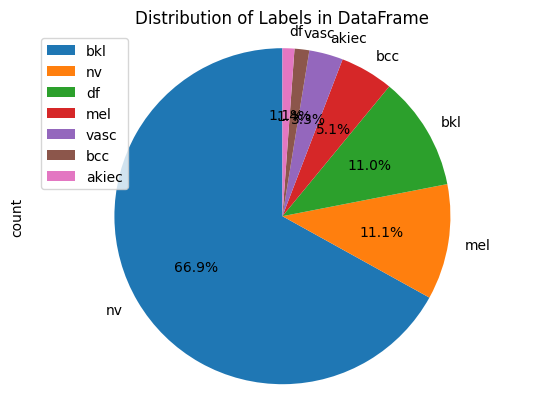

In [ ]:
# Plot pie chart of train_df
df['dx'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['dx'].unique())
plt.show()

In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               6705      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         10015     


In [ ]:
max_images_per_class = 3500

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("dx").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

In [ ]:
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [ ]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

8

In [ ]:

df['path'] = df['image_id'].map(imageid_path_dict.get) #Image Local Path
df['cell_type'] = df['dx'].map(lesion_type_dict.get) #Full 'dx' name
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes #Unique code for each 'dx'
print(df)

        lesion_id      image_id     dx    dx_type   age     sex   
0     HAM_0002644  ISIC_0029417  akiec      histo  80.0  female  \
1     HAM_0006002  ISIC_0029915  akiec      histo  50.0  female   
2     HAM_0000549  ISIC_0029360  akiec      histo  70.0    male   
3     HAM_0000549  ISIC_0026152  akiec      histo  70.0    male   
4     HAM_0000673  ISIC_0029659  akiec      histo  70.0  female   
...           ...           ...    ...        ...   ...     ...   
6805  HAM_0000415  ISIC_0025680   vasc  consensus  55.0  female   
6806  HAM_0004413  ISIC_0026068   vasc  consensus  55.0  female   
6807  HAM_0004257  ISIC_0025452   vasc  consensus  55.0  female   
6808  HAM_0003829  ISIC_0026349   vasc  consensus  60.0  female   
6809  HAM_0005560  ISIC_0027269   vasc  consensus  60.0  female   

         localization                                             path   
0                neck  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  \
1                face  ..\Data\HAM10000_images_

### 2. Preprocessing

#### Noise Removal


In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error
from skimage.restoration import denoise_bilateral

import plotly.graph_objects as go

from skimage.util import random_noise

from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# path
img_test = cv2.imread('F:\Capstone\Code_final\Data\HAM10000_images_part_1\ISIC_0024306.jpg', 0)

In [ ]:
img_test.shape

(450, 600)

<Figure size 1000x1000 with 0 Axes>

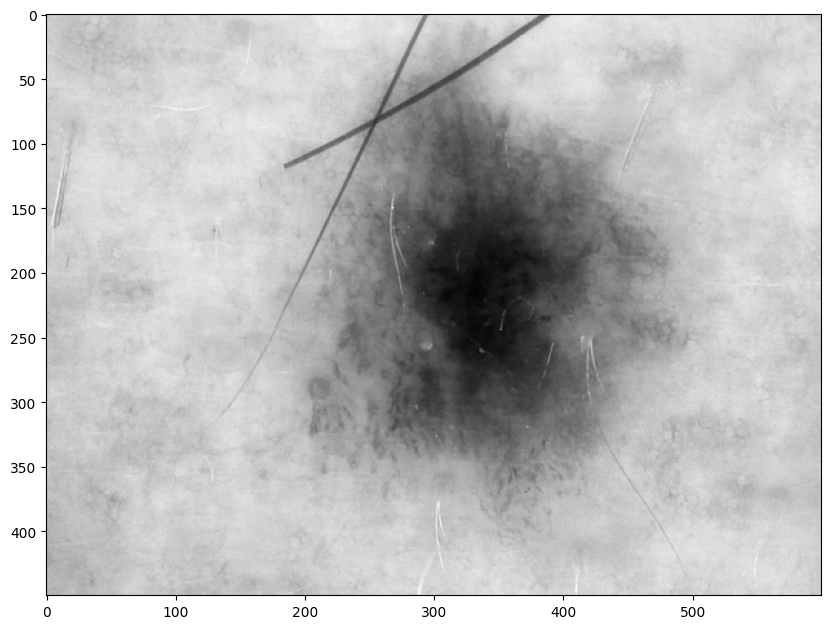

In [ ]:
# Displaying the image
plt.figure(figsize=(10, 10))
plt.imshow(img_test, cmap='gray')

In [ ]:
img_test_noisy_zncc = img_test + 50 * np.random.normal(loc=0.0, scale=1.0, size=img_test.shape)

zncc_1image = np.corrcoef(img_test.ravel(), img_test_noisy_zncc.ravel())[1,0]
psnr_1image = peak_signal_noise_ratio(img_test, img_test_noisy_zncc)
ssim_1image = structural_similarity(img_test, img_test_noisy_zncc, data_range=img_test.max() - img_test.min(), channel_axis=False)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1),plt.imshow(img_test, cmap='gray'),plt.title('Original',)
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(img_test_noisy_zncc, cmap='gray'),plt.title('Noised Image')

plt.suptitle('After Noise Factor:50 => PSNR:%0.4f ZNCC:%0.4f SSIM:%0.4f' %(psnr_1image, zncc_1image, ssim_1image), y=0.25)
 
plt.xticks([]), plt.yticks([])

C:\Users\dell\AppData\Local\Temp\ipykernel_10612\698816837.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_1image = peak_signal_noise_ratio(img_test, img_test_noisy_zncc)


<Figure size 1000x1000 with 0 Axes>

(<AxesSubplot: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'))

(([], []), ([], []))

(<AxesSubplot: title={'center': 'Noised Image'}>,
 Text(0.5, 1.0, 'Noised Image'))

Text(0.5, 0.25, 'After Noise Factor:50 => PSNR:14.1434 ZNCC:0.5275 SSIM:0.0229')

(([], []), ([], []))

In [ ]:
img_test_noisy = img_test_noisy.astype('float32')

<Figure size 1000x1000 with 0 Axes>

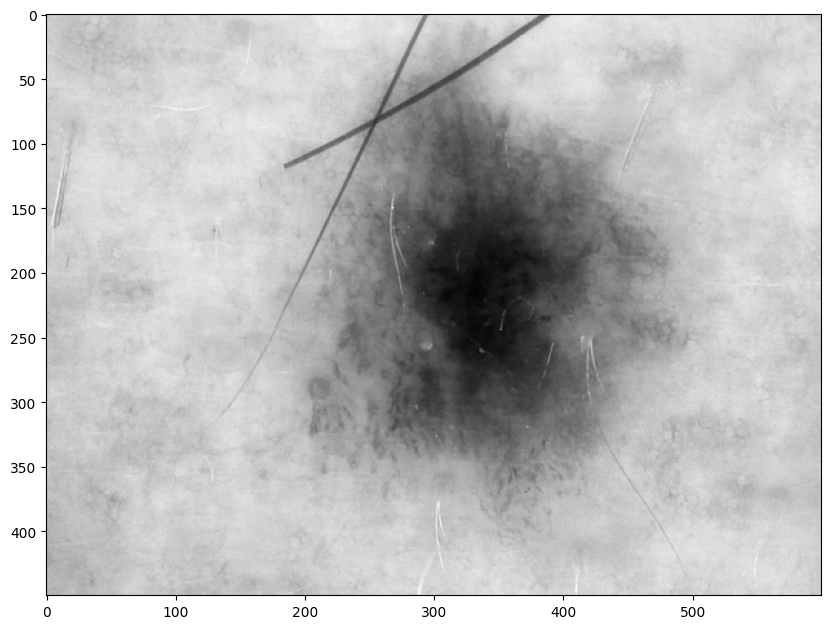

In [ ]:
# Displaying the image
plt.figure(figsize=(10, 10))
plt.imshow(img_test_noisy, cmap='gray')

plt.savefig('noised.png')

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1),plt.imshow(img_test, cmap='gray'),plt.title('Original',)
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(img_test_noisy, cmap='gray'),plt.title('Noised Image')
 
plt.xticks([]), plt.yticks([])

<Figure size 2000x2000 with 0 Axes>

(<AxesSubplot: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'))

(([], []), ([], []))

(<AxesSubplot: title={'center': 'Noised Image'}>,
 Text(0.5, 1.0, 'Noised Image'))

(([], []), ([], []))

In [ ]:
kernel = np.ones((3,3), np.float32)/9

denoised_mean = cv2.filter2D(img_test_noisy, -1,kernel)

In [ ]:
def function_image(img_test, img_test_noisy, denoised, filter_type):

    plt.figure(figsize=(20, 20))

    plt.subplot(1,3,1),plt.imshow(img_test, cmap='gray'),plt.title('Original',)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2),plt.imshow(img_test_noisy, cmap='gray'),plt.title('Noised Image')
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow(denoised, cmap='gray'),plt.title(filter_type)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    plt.savefig(str(filter_type)+'.png')

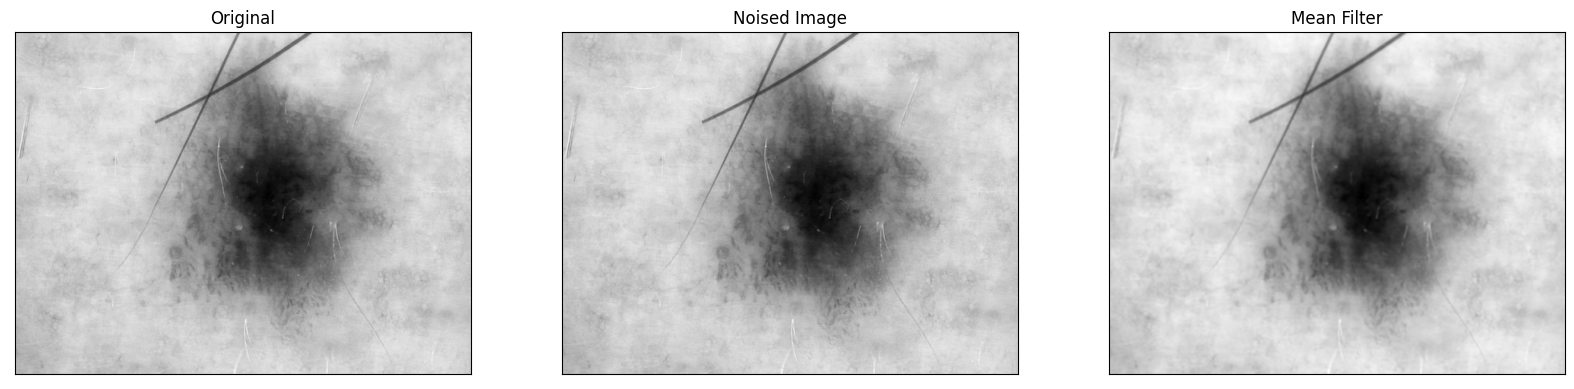

<Figure size 640x480 with 0 Axes>

In [ ]:
function_image(img_test, img_test_noisy, denoised_mean,'Mean Filter')

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [ ]:
def evaluate_image(filtername, img_test, img_test_noisy, denoised):
    
    # Calculating Values
    psnr_orgnoised = peak_signal_noise_ratio(img_test, img_test_noisy)
    psnr_orgdenoised = peak_signal_noise_ratio(img_test, denoised)
    
    ssim_orgnoised = structural_similarity(img_test, img_test_noisy, channel_axis=False)
    ssim_orgdenoised = structural_similarity(img_test, denoised, channel_axis=False)
    
    # Putting all values in DataFrame
    data = [{'Filter Name':filtername,'PSNR ORG-NOISED': psnr_orgnoised, 'PSNR ORG-DENOISED': psnr_orgdenoised, 'SSIM ORG-NOISED':ssim_orgnoised, 'SSIM ORG-DENOISED':ssim_orgdenoised}] 
    df = pd.DataFrame(data)
    
    return df

In [ ]:
# Parameters: Width and Height of the kernel which should be positive and odd. 
# Standard Deviation in the X and Y directions, sigmaX and sigmaY.

denoised_gaussian_05 = cv2.GaussianBlur(img_test_noisy,(3,3),0.5)

In [ ]:
function_image(img_test, img_test_noisy, denoised_gaussian_05, 'Gaussian Filter')

<Figure size 640x480 with 0 Axes>

### Histogram equalization

#### Removing Noise Artifacts and Enhancing Contast

In [ ]:
import os
import cv2

def process_images_in_folder(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over all files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image (you can add more image extensions if needed)
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(input_folder, filename)
            img = cv2.imread(image_path)  # Read image in color (BGR)

            # Convert image to YUV color space
            img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

            # Apply Histogram Equalization to Y channel
            img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

            # Convert image back to BGR color space
            img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

            # Save the result
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, img_output)

            print(f"Processed image '{filename}' and saved result to '{output_path}'")

# Specify the input folder containing images
input_folder = "F:/Capstone/Code_final/Data/HAM10000_images_part_1"

# Specify the output folder where processed images will be saved
output_folder = "F:/Capstone/Code_final/Data/Processed_Images"

# Process images in the input folder and save the results to the output folder
process_images_in_folder(input_folder, output_folder)


### Resizing and Cropping

### 3. Segmentation

### Otsu's Thresholding Segmentation:

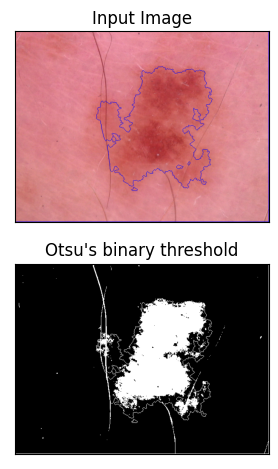

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image_path = "F:/Capstone/Code_final/Data/Processed_Images/ISIC_0024307.jpg"
img=cv2.imread(image_path)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image_path =  "F:\Capstone\Code_final\Data\HAM10000_images_part_1\ISIC_0024311.jpg"
img = cv2.imread(image_path)

b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

def process_image(image_path, output_folder):
    # Load the image
    img = cv2.imread(image_path)
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu's thresholding
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # Noise removal
    kernel = np.ones((2,2), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Sure background area
    sure_bg = cv2.dilate(closing, kernel, iterations=3)
    
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 3)
    ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    
    # Mark the region of unknown with zero
    markers[unknown==255] = 0
    
    # Watershed segmentation
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]
    
    # Save processed image
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_path, img)

# Input and output folders
input_folder = "F:/Capstone/Code_final/Data/Processed_Images"
output_folder = "F:/Capstone/Code_final/Data/Segmented_Images"

# Process images in the input folder and save results in the output folder
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(input_folder, filename)
        process_image(image_path, output_folder)


### Region Based Segmentation:

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, morphology, filters
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.segmentation import clear_border

# Load the image from the specified path
image_path = "F:/Capstone/Code_final/Data/Processed_Images/ISIC_0024307.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's thresholding to segment the image
thresh = filters.threshold_otsu(gray_image)
binary_image = gray_image > thresh

# Remove small objects and clear borders
binary_image = morphology.remove_small_objects(binary_image, min_size=1000)
binary_image = clear_border(binary_image)

# Label regions
label_image = label(binary_image)

# Colorize regions
image_label_overlay = label2rgb(label_image, image=image)

# Display original image and segmented image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_label_overlay)
axes[1].set_title('Segmented Image')
axes[1].axis('off')
plt.show()


## Augmentation

### Hair Removal:

(450, 600, 3)


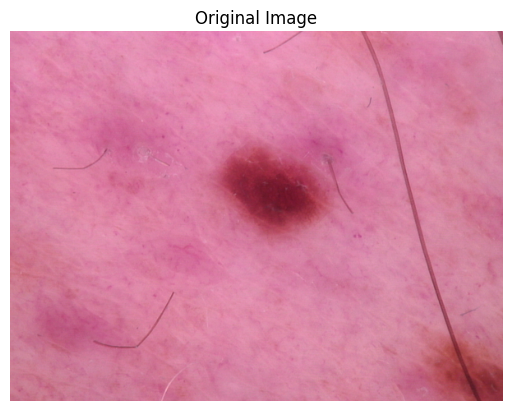

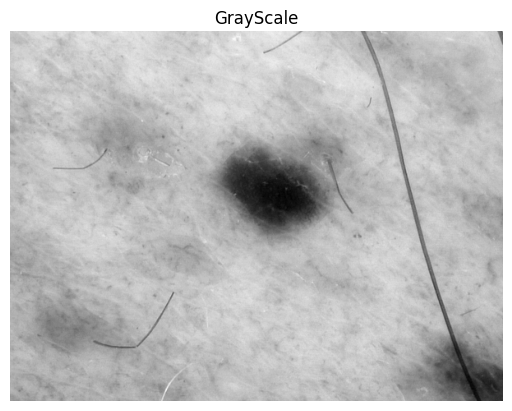

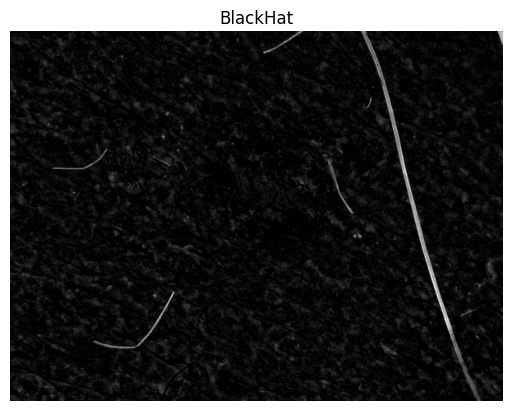

(450, 600)


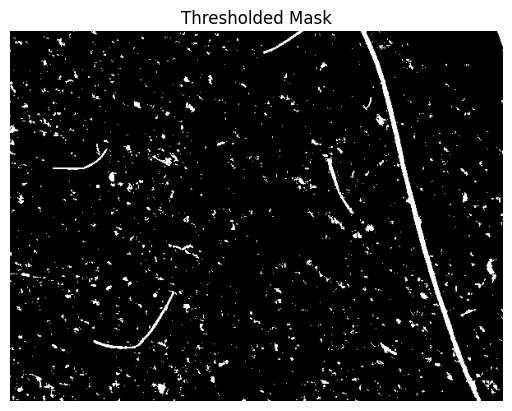

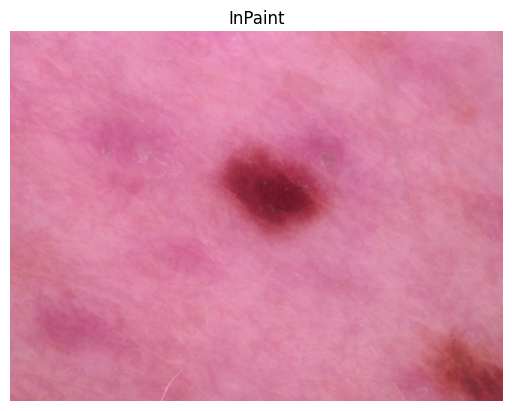

In [ ]:
# -*- coding: utf-8 -*-
"""
Following are the DHR tasks followed in this example code:
    
    -- Applying Morphological Black-Hat transformation
    -- Creating the mask for InPainting task
    -- Applying inpainting algorithm on the image

"""

import cv2
import matplotlib.pyplot as plt

src = cv2.imread("F:/Capstone/Code_final/Data/HAM10000_images_part_1/ISIC_0024389.jpg")

print(src.shape)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Convert the original image to grayscale
grayScale = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
plt.imshow(grayScale, cmap='gray')
plt.title("GrayScale")
plt.axis('off')
plt.show()

# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1, (17, 17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat, cmap='gray')
plt.title("BlackHat")
plt.axis('off')
plt.show()

# intensify the hair countours in preparation for the inpainting 
# algorithm
ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
print(thresh2.shape)
plt.imshow(thresh2, cmap='gray')
plt.title("Thresholded Mask")
plt.axis('off')
plt.show()

# inpaint the original image depending on the mask
dst = cv2.inpaint(src, thresh2, 1, cv2.INPAINT_TELEA)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("InPaint")
plt.axis('off')
plt.show()


In [ ]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,75)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

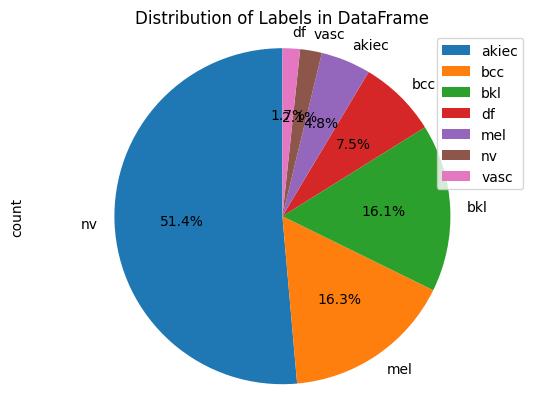

In [ ]:
# Plot pie chart of train_df
df['dx'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['dx'].unique())
plt.show()

In [ ]:
df.head()

lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                        path          cell_type   
0  ..\Data\Segmented_Images\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\Segmented_Images\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\Segmented_Images\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\Segmented_Images\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\Segmented_Images\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  
0              0  [[[15, 5, 73], [19, 5, 42], [18, 5, 46], [19, ...  
1              0  [[[7, 3, 68], [9, 2, 35], [10, 2, 37], [10, 2,...  
2              0  [[[6, 3, 68], [6, 2, 35], [6, 2, 36], [6, 2, 3...  
3              0  [[[114, 95, 179], [152, 129, 184], [154, 132, ...  
4              0  [[[88, 49, 151], [104, 46, 86], [96, 36, 75], ...

In [ ]:
# Count the number of images in each class
class_counts = df['dx'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
nv              Melanocytic nevi               3500      
mel             Melanoma                       1113      
bkl             Benign keratosis-like lesions  1099      
bcc             Basal cell carcinoma           514       
akiec           Actinic keratoses              327       
vasc            Vascular lesions               142       
df              Dermatofibroma                 115       
------------------------------------------------------------
Total                                         6810      


In [ ]:
num_classes=len(lesion_type_dict)

In [ ]:
label_map = {'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3, 'akiec': 4, 'vasc': 5, 'df': 6}
# Map values in 'dx' column to integer labels using the dictionary
df['label'] = df['dx'].map(label_map)

In [ ]:
df.head()

lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              0  [[[30, 15, 19], [32, 16, 21], [32, 16, 21], [3...      4  
1              0  [[[28, 14, 14], [31, 15, 15], [35, 19, 19], [4...      4  
2              0  [[[17, 7, 12], [20, 9, 12], [21, 10, 14], [29,...      4  
3              0  [[[187, 162, 192], [191, 167, 195], [193, 167,...      4  
4              0  [[[194, 129, 131], [189, 121, 120], [186, 118,...      4

In [ ]:
unique_labels = df['label'].unique()
print(unique_labels)


[4 3 2 6 1 0 5]


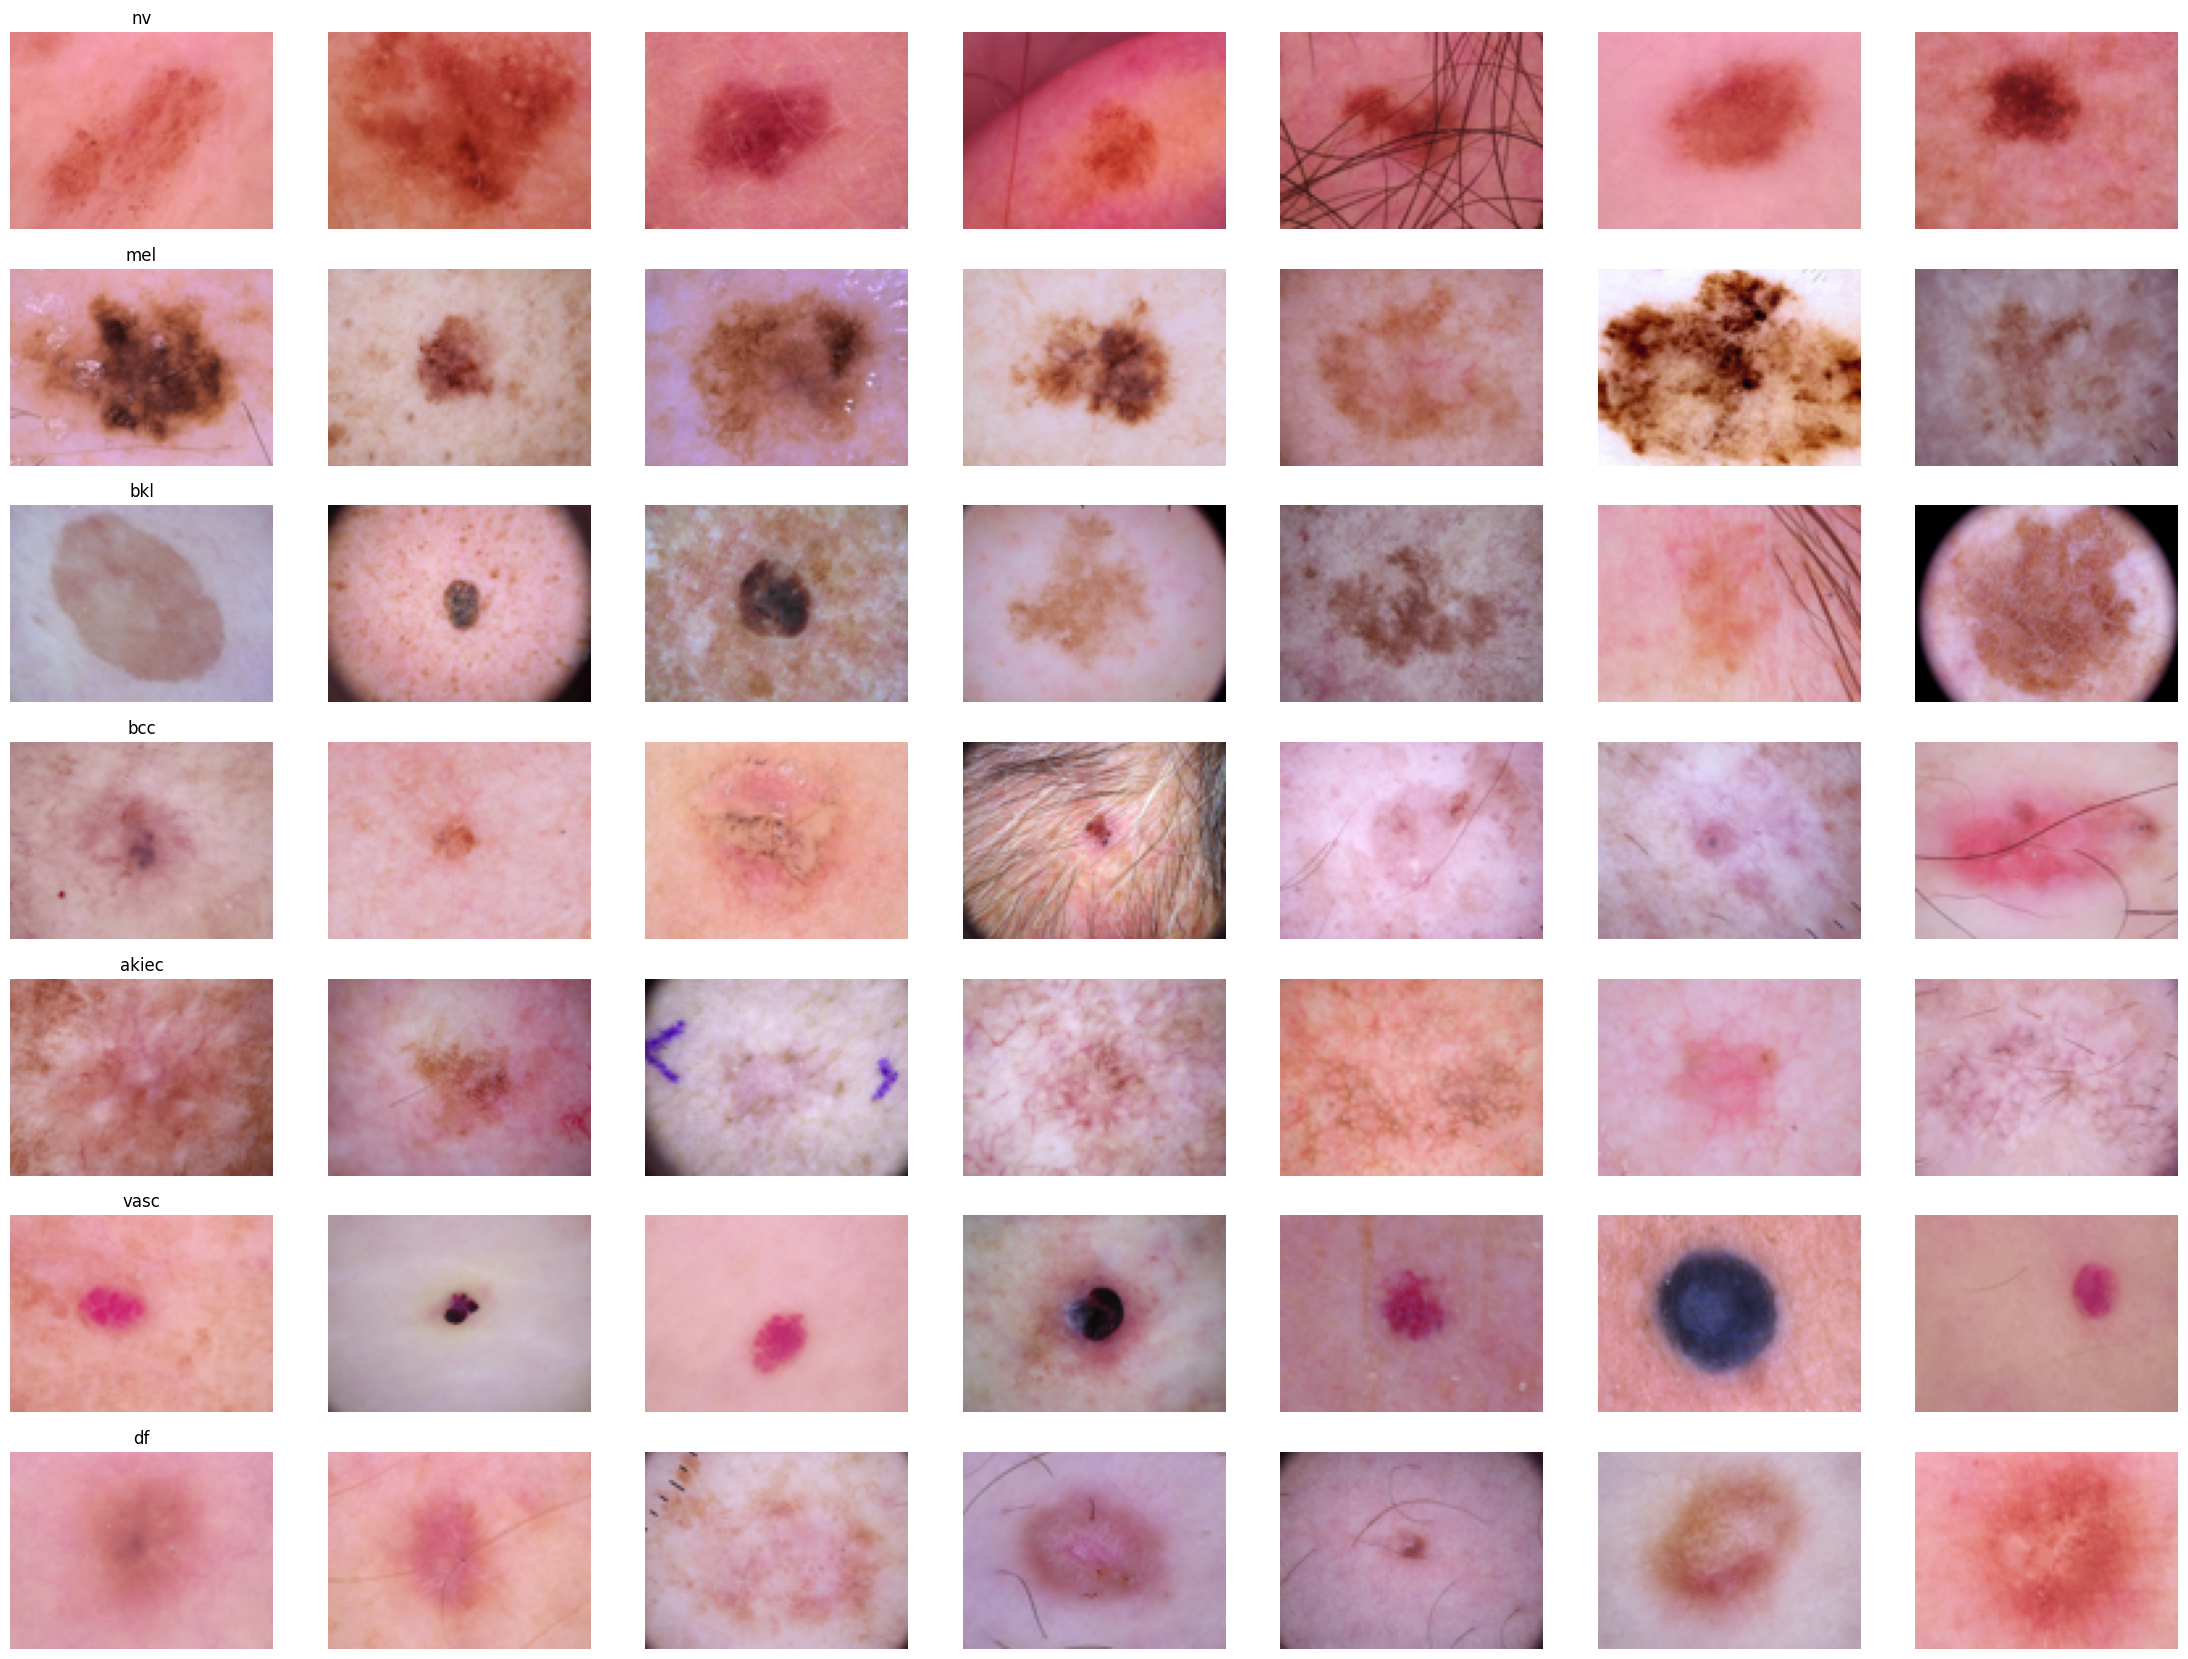

In [ ]:
# Reverse the label_map dictionary to map integer labels to class names
lesion_type_dict = {v: k for k, v in label_map.items()}

# Plotting code
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = lesion_type_dict[class_idx] # get the class name using lesion_type_dict
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


In [ ]:
print(df.head())
df['image'].map(lambda x: x.shape).value_counts()

     lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              

image
(75, 100, 3)    6810
Name: count, dtype: int64

In [ ]:
df.head()

lesion_id      image_id     dx dx_type   age     sex     localization   
0  HAM_0002644  ISIC_0029417  akiec   histo  80.0  female             neck  \
1  HAM_0006002  ISIC_0029915  akiec   histo  50.0  female             face   
2  HAM_0000549  ISIC_0029360  akiec   histo  70.0    male  upper extremity   
3  HAM_0000549  ISIC_0026152  akiec   histo  70.0    male  upper extremity   
4  HAM_0000673  ISIC_0029659  akiec   histo  70.0  female             face   

                                              path          cell_type   
0  ..\Data\HAM10000_images_part_2\ISIC_0029417.jpg  Actinic keratoses  \
1  ..\Data\HAM10000_images_part_2\ISIC_0029915.jpg  Actinic keratoses   
2  ..\Data\HAM10000_images_part_2\ISIC_0029360.jpg  Actinic keratoses   
3  ..\Data\HAM10000_images_part_1\ISIC_0026152.jpg  Actinic keratoses   
4  ..\Data\HAM10000_images_part_2\ISIC_0029659.jpg  Actinic keratoses   

   cell_type_idx                                              image  label  
0              0  [[[30, 15, 19], [32, 16, 21], [32, 16, 21], [3...      4  
1              0  [[[28, 14, 14], [31, 15, 15], [35, 19, 19], [4...      4  
2              0  [[[17, 7, 12], [20, 9, 12], [21, 10, 14], [29,...      4  
3              0  [[[187, 162, 192], [191, 167, 195], [193, 167,...      4  
4              0  [[[194, 129, 131], [189, 121, 120], [186, 118,...      4

### SMOTE Method for oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import numpy as np

# Generate synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 900, 1: 900}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator object with the desired transformations
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')
# Create an ImageDataGenerator object with the desired transformations

# GAN Method
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import os
from skimage import io

# Define the generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the discriminator
def compile_discriminator(discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the GAN
def compile_gan(gan):
    gan.compile(optimizer='adam', loss='binary_crossentropy')

# Define a function to train the GAN
def train_gan(generator, discriminator, gan, images, epochs=100, batch_size=128, latent_dim=100):
    for epoch in range(epochs):
        # Generate random noise samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        # Generate fake images using the generator
        fake_images = generator.predict(noise)
        # Select a random batch of real images
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        # Combine real and fake images into a single batch
        X = np.concatenate([real_images, fake_images])
        # Labels for real and fake images
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, y_real)
        d_loss_fake = discriminator.train_on_batch(fake_images, y_fake)
        # Train the generator via the GAN model
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        y_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, y_gan)
        # Print progress
        print(f"Epoch {epoch+1}/{epochs} | Discriminator Loss: {0.5 * np.add(d_loss_real, d_loss_fake)} | Generator Loss: {g_loss}")

# Load the dataset (e.g., MNIST)
def load_dataset(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory, filename)
            image = io.imread(image_path)
            images.append(image)
    return np.array(images)

# Preprocess the images
def preprocess_images(images):
    # Normalize and reshape the images
    images = images.astype('float32') / 255.0
    images = np.expand_dims(images, axis=-1)
    return images

# Main function
def main():
    # Define parameters
    latent_dim = 100
    epochs = 10
    batch_size = 128
    image_directory = "F:/Capstone/Code_final/Data/reorganized"

    # Load and preprocess the dataset
    images = load_dataset(image_directory)
    images = preprocess_images(images)

    # Define and compile the discriminator
    discriminator = build_discriminator((28, 28, 1))
    compile_discriminator(discriminator)

    # Define and compile the GAN
    generator = build_generator(latent_dim)
    gan = build_gan(generator, discriminator)
    compile_gan(gan)

    # Train the GAN
    train_gan(generator, discriminator, gan, images, epochs=epochs, batch_size=batch_size, latent_dim=latent_dim)

# Entry point of the script
if __name__ == "__main__":
    main()
datagen = ImageDataGenerator(featurewise_center=False, 
                            samplewise_center=False, 
                            featurewise_std_normalization=False, 
                            samplewise_std_normalization=False, 
                            zca_whitening=False, 
                            zca_epsilon=1e-06, 
                            rotation_range=20, 
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            brightness_range=None, 
                            shear_range=0.1, 
                            zoom_range=0.1, 
                            channel_shift_range=0.1, 
                            fill_mode='nearest', 
                            cval=0.0, 
                            horizontal_flip=False, 
                            vertical_flip=False, 
                            rescale=None, 
                            preprocessing_function=None, 
                            data_format='channels_last', 
                            validation_split=0.0, 
                            interpolation_order=1, 
                            dtype='float32')

In [ ]:
# Create an empty dataframe to store the augmented images
augmented_df = pd.DataFrame(columns=['path', 'label', 'image'])

# Loop through each class label and generate additional images if needed
for class_label in df['label'].unique():
    # Get the image arrays for the current class
    image_arrays = df.loc[df['label'] == class_label, 'image'].values
        # Calculate the number of additional images needed for the current class
    num_images_needed = max_images_per_class - len(image_arrays)
     # Generate augmented images for the current class
    if num_images_needed > 0:
        # Select a random subset of the original images
        selected_images = np.random.choice(image_arrays, size=num_images_needed)

          # Apply transformations to the selected images and add them to the augmented dataframe
        for image_array in selected_images:
            # Reshape the image array to a 4D tensor with a batch size of 1
            image_tensor = np.expand_dims(image_array, axis=0)

            # Generate the augmented images
            augmented_images = datagen.flow(image_tensor, batch_size=1)
            # Extract the augmented image arrays and add them to the augmented dataframe
            for i in range(augmented_images.n):
                augmented_image_array = augmented_images.next()[0].astype('uint8')
                augmented_df = augmented_df._append({'path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)



     # Add the original images for the current class to the augmented dataframe
    original_images_df = df.loc[df['label'] == class_label, ['path', 'label', 'image']]
    augmented_df = augmented_df._append(original_images_df, ignore_index=True)

# Group the augmented dataframe by the 'label' column and filter out extra images
df = augmented_df.groupby('label').head(max_images_per_class)

del augmented_df

# Use the augmented dataframe for further processing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()
print(class_counts)
# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in lesion_type_dict.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

label
0    3500
1    3500
2    3500
3    3500
4    3500
5    3500
6    3500
Name: count, dtype: int64
Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               nv                             3500      
1               mel                            3500      
2               bkl                            3500      
3               bcc                            3500      
4               akiec                          3500      
5               vasc                           3500      
6               df                             3500      
------------------------------------------------------------
Total                                         24500     


In [ ]:
features = df.drop(columns=['label','path'],axis=1)
target = df['label']

In [ ]:
features.head()

image
0  [[[38, 22, 25], [39, 24, 27], [47, 30, 33], [6...
1  [[[208, 173, 185], [210, 175, 189], [213, 179,...
2  [[[165, 115, 112], [164, 114, 112], [163, 113,...
3  [[[154, 126, 125], [156, 127, 127], [158, 130,...
4  [[[241, 215, 226], [241, 215, 226], [241, 215,...

In [ ]:
target.head()

0    1
1    5
2    4
3    1
4    5
Name: label, dtype: object

In [ ]:
print(target.shape,features.shape)

(24500,) (24500, 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20,shuffle=True)

In [ ]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std


In [ ]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2,shuffle=True)

In [ ]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [ ]:
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

In [ ]:
# Calculate the number of images in each class for train, validation, and test datasets
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

# Print the number of images in each class for train, validation, and test datasets
print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)

# Iterate over each class label
for i, class_name in enumerate(label_map.values()):
    class_label = list(label_map.keys())[i]
    train_num = int(train_counts[i])
    val_num = int(val_counts[i])
    test_num = int(test_counts[i])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")

print("-" * 90)

# Print the total number of images
total_train = np.sum(train_counts)
total_val = np.sum(val_counts)
total_test = np.sum(test_counts)
total_images = total_train + total_val + total_test
print(f"{'Total':<46} {total_train:<10} {total_val:<12} {total_test:<10} {total_images:<10}")


Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
nv              0                              2232       540          728        3500      
mel             1                              2185       575          740        3500      
bkl             2                              2246       567          687        3500      
bcc             3                              2221       567          712        3500      
akiec           4                              2257       552          691        3500      
vasc            5                              2230       571          699        3500      
df              6                              2309       548          643        3500      
----------------------------------------------------------

In [ ]:
df.groupby('label').size()

label
0    3500
1    3500
2    3500
3    3500
4    3500
5    3500
6    3500
dtype: int64

In [ ]:
input_shape = df['image'][0].shape

## Finetuning DenseNet Model

In [ ]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.densenet import DenseNet201
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import keras.backend as K

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
pre_trained_model = DenseNet201(input_shape=(75, 100, 3), include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers:
    print(layer.name)
    if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
        layer.trainable = True
        K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
        K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
    else:
        layer.trainable = False

print(len(pre_trained_model.layers))

input_4
zero_padding2d_2
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_3
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3

In [ ]:
last_layer = pre_trained_model.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 2, 3, 1920)


### Retraining Half of the layers of base Model:

In [ ]:
for layer in pre_trained_model.layers[481:]:
    layer.trainable = True

### Adding Custome layers:

In [6]:
# Add custom layers
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(base_model.output)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)
output = layers.Dense(8, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display model summary
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 75, 100, 3)]         0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 81, 106, 3)           0         ['input_6[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 38, 50, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 38, 50, 64)           256       ['conv1/conv[0][0]']    

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(x_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(x_validate)

In [ ]:
pre_trained_model.layers[481].name

'conv5_block1_0_bn'

In [ ]:
from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Define your model architecture...

# Compile the model using the legacy Keras optimizer
optimizer = legacy_optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 75, 100, 3)]         0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 81, 106, 3)           0         ['input_4[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 38, 50, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 38, 50, 64)           256       ['conv1/conv[0][0]']    

In [ ]:
batch_size = 32
epochs = 50
history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(x_validate, y_validate),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size),
                              validation_steps=(x_validate.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

Epoch 1/50


/var/folders/5l/_xcxp8dj3jg8wqbs9w6t88600000gn/T/ipykernel_4292/2727610588.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),


350/350 [==============================] - ETA: 0s - loss: 1.3810 - accuracy: 0.5267WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 265s 737ms/step - loss: 1.3810 - accuracy: 0.5267 - val_loss: 0.8772 - val_accuracy: 0.6756 - lr: 1.0000e-04
Epoch 2/50
350/350 [==============================] - ETA: 0s - loss: 0.8672 - accuracy: 0.6818WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 257s 734ms/step - loss: 0.8672 - accuracy: 0.6818 - val_loss: 0.6436 - val_accuracy: 0.7543 - lr: 1.0000e-04
Epoch 3/50
350/350 [==============================] - ETA: 0s - loss: 0.7076 - accuracy: 0.7321WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 248s 708ms/step - loss: 0.7076 - accuracy: 0.7321 - val_loss: 0.5228 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 4/50
350/350 [==============================] - ETA: 0s - loss: 0.5983 - accuracy: 0.7772WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 249s 711ms/step - loss: 0.5983 - accuracy: 0.7772 - val_loss: 0.4639 - val_accuracy: 0.8308 - lr: 1.0000e-04
Epoch 5/50
350/350 [==============================] - ETA: 0s - loss: 0.5202 - accuracy: 0.8047WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 325s 928ms/step - loss: 0.5202 - accuracy: 0.8047 - val_loss: 0.4312 - val_accuracy: 0.8423 - lr: 1.0000e-04
Epoch 6/50
350/350 [==============================] - ETA: 0s - loss: 0.4633 - accuracy: 0.8300WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 283s 809ms/step - loss: 0.4633 - accuracy: 0.8300 - val_loss: 0.4109 - val_accuracy: 0.8402 - lr: 1.0000e-04
Epoch 7/50
350/350 [==============================] - ETA: 0s - loss: 0.4074 - accuracy: 0.8480WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 258s 736ms/step - loss: 0.4074 - accuracy: 0.8480 - val_loss: 0.3272 - val_accuracy: 0.8879 - lr: 1.0000e-04
Epoch 8/50
350/350 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.8597WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 268s 765ms/step - loss: 0.3772 - accuracy: 0.8597 - val_loss: 0.3203 - val_accuracy: 0.8912 - lr: 1.0000e-04
Epoch 9/50
350/350 [==============================] - ETA: 0s - loss: 0.3472 - accuracy: 0.8722WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 273s 780ms/step - loss: 0.3472 - accuracy: 0.8722 - val_loss: 0.2827 - val_accuracy: 0.9041 - lr: 1.0000e-04
Epoch 10/50
350/350 [==============================] - ETA: 0s - loss: 0.3087 - accuracy: 0.8859WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 616s 2s/step - loss: 0.3087 - accuracy: 0.8859 - val_loss: 0.2807 - val_accuracy: 0.9027 - lr: 1.0000e-04
Epoch 11/50
350/350 [==============================] - ETA: 0s - loss: 0.2833 - accuracy: 0.8984WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 519s 1s/step - loss: 0.2833 - accuracy: 0.8984 - val_loss: 0.2756 - val_accuracy: 0.9019 - lr: 1.0000e-04
Epoch 12/50
350/350 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.9040WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 471s 1s/step - loss: 0.2633 - accuracy: 0.9040 - val_loss: 0.2392 - val_accuracy: 0.9163 - lr: 1.0000e-04
Epoch 13/50
350/350 [==============================] - ETA: 0s - loss: 0.2445 - accuracy: 0.9162WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 370s 1s/step - loss: 0.2445 - accuracy: 0.9162 - val_loss: 0.2092 - val_accuracy: 0.9318 - lr: 1.0000e-04
Epoch 14/50
350/350 [==============================] - ETA: 0s - loss: 0.2227 - accuracy: 0.9176WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 358s 1s/step - loss: 0.2227 - accuracy: 0.9176 - val_loss: 0.2005 - val_accuracy: 0.9343 - lr: 1.0000e-04
Epoch 15/50
350/350 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.9243WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 475s 1s/step - loss: 0.2058 - accuracy: 0.9243 - val_loss: 0.1898 - val_accuracy: 0.9432 - lr: 1.0000e-04
Epoch 16/50
350/350 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.9265WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 279s 796ms/step - loss: 0.2048 - accuracy: 0.9265 - val_loss: 0.2911 - val_accuracy: 0.9109 - lr: 1.0000e-04
Epoch 17/50
350/350 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.9354WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 276s 787ms/step - loss: 0.1815 - accuracy: 0.9354 - val_loss: 0.1937 - val_accuracy: 0.9400 - lr: 1.0000e-04
Epoch 18/50
350/350 [==============================] - ETA: 0s - loss: 0.1755 - accuracy: 0.9371WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 276s 788ms/step - loss: 0.1755 - accuracy: 0.9371 - val_loss: 0.1804 - val_accuracy: 0.9443 - lr: 1.0000e-04
Epoch 19/50
350/350 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9442WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 279s 798ms/step - loss: 0.1671 - accuracy: 0.9442 - val_loss: 0.1526 - val_accuracy: 0.9544 - lr: 1.0000e-04
Epoch 20/50
350/350 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.9473WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 299s 854ms/step - loss: 0.1529 - accuracy: 0.9473 - val_loss: 0.2231 - val_accuracy: 0.9325 - lr: 1.0000e-04
Epoch 21/50
350/350 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9432WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 281s 802ms/step - loss: 0.1537 - accuracy: 0.9432 - val_loss: 0.2408 - val_accuracy: 0.9314 - lr: 1.0000e-04
Epoch 22/50
350/350 [==============================] - ETA: 0s - loss: 0.1381 - accuracy: 0.9522WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 278s 793ms/step - loss: 0.1381 - accuracy: 0.9522 - val_loss: 0.1792 - val_accuracy: 0.9486 - lr: 1.0000e-04
Epoch 23/50
350/350 [==============================] - ETA: 0s - loss: 0.1360 - accuracy: 0.9521WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 324s 927ms/step - loss: 0.1360 - accuracy: 0.9521 - val_loss: 0.1610 - val_accuracy: 0.9522 - lr: 1.0000e-04
Epoch 24/50
350/350 [==============================] - ETA: 0s - loss: 0.1208 - accuracy: 0.9582WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 348s 995ms/step - loss: 0.1208 - accuracy: 0.9582 - val_loss: 0.1787 - val_accuracy: 0.9515 - lr: 1.0000e-04
Epoch 25/50
350/350 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9597WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 349s 996ms/step - loss: 0.1205 - accuracy: 0.9597 - val_loss: 0.1627 - val_accuracy: 0.9540 - lr: 1.0000e-04
Epoch 26/50
350/350 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9581WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 353s 1s/step - loss: 0.1197 - accuracy: 0.9581 - val_loss: 0.1520 - val_accuracy: 0.9594 - lr: 1.0000e-04
Epoch 27/50
350/350 [==============================] - ETA: 0s - loss: 0.1044 - accuracy: 0.9646WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 359s 1s/step - loss: 0.1044 - accuracy: 0.9646 - val_loss: 0.2079 - val_accuracy: 0.9436 - lr: 1.0000e-04
Epoch 28/50
350/350 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9621WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 365s 1s/step - loss: 0.1129 - accuracy: 0.9621 - val_loss: 0.1280 - val_accuracy: 0.9659 - lr: 1.0000e-04
Epoch 29/50
350/350 [==============================] - ETA: 0s - loss: 0.0936 - accuracy: 0.9687WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 357s 1s/step - loss: 0.0936 - accuracy: 0.9687 - val_loss: 0.1883 - val_accuracy: 0.9522 - lr: 1.0000e-04
Epoch 30/50
350/350 [==============================] - ETA: 0s - loss: 0.1024 - accuracy: 0.9633WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 292s 832ms/step - loss: 0.1024 - accuracy: 0.9633 - val_loss: 0.1622 - val_accuracy: 0.9547 - lr: 1.0000e-04
Epoch 31/50
350/350 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9691WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 286s 818ms/step - loss: 0.0947 - accuracy: 0.9691 - val_loss: 0.1426 - val_accuracy: 0.9641 - lr: 1.0000e-04
Epoch 32/50
350/350 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.9705WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 285s 813ms/step - loss: 0.0835 - accuracy: 0.9705 - val_loss: 0.1576 - val_accuracy: 0.9612 - lr: 1.0000e-04
Epoch 33/50
350/350 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.9696WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 284s 811ms/step - loss: 0.0912 - accuracy: 0.9696 - val_loss: 0.1613 - val_accuracy: 0.9616 - lr: 1.0000e-04
Epoch 34/50
350/350 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.9730WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 281s 803ms/step - loss: 0.0820 - accuracy: 0.9730 - val_loss: 0.1528 - val_accuracy: 0.9630 - lr: 1.0000e-04
Epoch 35/50
350/350 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9720WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 282s 805ms/step - loss: 0.0836 - accuracy: 0.9720 - val_loss: 0.1418 - val_accuracy: 0.9623 - lr: 1.0000e-04
Epoch 36/50
350/350 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9710WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 282s 806ms/step - loss: 0.0877 - accuracy: 0.9710 - val_loss: 0.1373 - val_accuracy: 0.9666 - lr: 1.0000e-04
Epoch 37/50
350/350 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9736WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 276s 787ms/step - loss: 0.0811 - accuracy: 0.9736 - val_loss: 0.1098 - val_accuracy: 0.9673 - lr: 1.0000e-04
Epoch 38/50
350/350 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9746WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 278s 793ms/step - loss: 0.0755 - accuracy: 0.9746 - val_loss: 0.1469 - val_accuracy: 0.9619 - lr: 1.0000e-04
Epoch 39/50
350/350 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9742WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 277s 791ms/step - loss: 0.0757 - accuracy: 0.9742 - val_loss: 0.1528 - val_accuracy: 0.9666 - lr: 1.0000e-04
Epoch 40/50
350/350 [==============================] - ETA: 0s - loss: 0.0699 - accuracy: 0.9759WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 278s 795ms/step - loss: 0.0699 - accuracy: 0.9759 - val_loss: 0.1383 - val_accuracy: 0.9680 - lr: 1.0000e-04
Epoch 41/50
350/350 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9787WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 279s 797ms/step - loss: 0.0625 - accuracy: 0.9787 - val_loss: 0.1695 - val_accuracy: 0.9644 - lr: 1.0000e-04
Epoch 42/50
350/350 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9776WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 283s 807ms/step - loss: 0.0643 - accuracy: 0.9776 - val_loss: 0.1584 - val_accuracy: 0.9659 - lr: 1.0000e-04
Epoch 43/50
350/350 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9743WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 323s 924ms/step - loss: 0.0736 - accuracy: 0.9743 - val_loss: 0.1735 - val_accuracy: 0.9605 - lr: 1.0000e-04
Epoch 44/50
350/350 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9747WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 290s 827ms/step - loss: 0.0703 - accuracy: 0.9747 - val_loss: 0.1621 - val_accuracy: 0.9641 - lr: 1.0000e-04
Epoch 45/50
350/350 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9779WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 288s 822ms/step - loss: 0.0686 - accuracy: 0.9779 - val_loss: 0.1190 - val_accuracy: 0.9684 - lr: 1.0000e-04
Epoch 46/50
350/350 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.9786WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 313s 894ms/step - loss: 0.0659 - accuracy: 0.9786 - val_loss: 0.1461 - val_accuracy: 0.9677 - lr: 1.0000e-04
Epoch 47/50
350/350 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9804WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 304s 868ms/step - loss: 0.0617 - accuracy: 0.9804 - val_loss: 0.1530 - val_accuracy: 0.9648 - lr: 1.0000e-04
Epoch 48/50
350/350 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9789WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 290s 829ms/step - loss: 0.0647 - accuracy: 0.9789 - val_loss: 0.1496 - val_accuracy: 0.9684 - lr: 1.0000e-04
Epoch 49/50
350/350 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9791WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 271s 775ms/step - loss: 0.0621 - accuracy: 0.9791 - val_loss: 0.1510 - val_accuracy: 0.9680 - lr: 1.0000e-04
Epoch 50/50
350/350 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9821WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


350/350 [==============================] - 249s 710ms/step - loss: 0.0495 - accuracy: 0.9821 - val_loss: 0.1444 - val_accuracy: 0.9691 - lr: 1.0000e-04


In [ ]:
model.save("Finetune_DenseNet.h5")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Finetuning InceptionV3 Model

In [ ]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
pre_trained_model = InceptionV3(input_shape=(75, 100, 3), include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers:
    print(layer.name)
    if hasattr(layer, 'moving_mean') and hasattr(layer, 'moving_variance'):
        layer.trainable = True
        K.eval(K.update(layer.moving_mean, K.zeros_like(layer.moving_mean)))
        K.eval(K.update(layer.moving_variance, K.zeros_like(layer.moving_variance)))
    else:
        layer.trainable = False

print(len(pre_trained_model.layers))

input_4
conv2d_391
batch_normalization_391
activation_391
conv2d_392
batch_normalization_392
activation_392
conv2d_393
batch_normalization_393
activation_393
max_pooling2d_12
conv2d_394
batch_normalization_394
activation_394
conv2d_395
batch_normalization_395
activation_395
max_pooling2d_13
conv2d_399
batch_normalization_399
activation_399
conv2d_397
conv2d_400
batch_normalization_397
batch_normalization_400
activation_397
activation_400
average_pooling2d_19
conv2d_396
conv2d_398
conv2d_401
conv2d_402
batch_normalization_396
batch_normalization_398
batch_normalization_401
batch_normalization_402
activation_396
activation_398
activation_401
activation_402
mixed0
conv2d_406
batch_normalization_406
activation_406
conv2d_404
conv2d_407
batch_normalization_404
batch_normalization_407
activation_404
activation_407
average_pooling2d_20
conv2d_403
conv2d_405
conv2d_408
conv2d_409
batch_normalization_403
batch_normalization_405
batch_normalization_408
batch_normalization_409
activation_403
acti

In [ ]:
model = keras.models.load_model("Normal_InceptionV3.h5")

### Retraining half of the layers of base model:

In [ ]:
for layer in pre_trained_model.layers[249:]:
    layer.trainable = True

### Adding Custom Layers:

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(75, 100, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

# Use the legacy optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 75, 100, 3)]         0         []                            
                                                                                                  
 conv2d_102 (Conv2D)         (None, 37, 49, 32)           864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 37, 49, 32)           96        ['conv2d_102[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 37, 49, 32)           0         ['batch_normalization_94

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [ ]:
batch_size = 64
epochs = 130
history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(x_validate, y_validate),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size),
                              validation_steps=(x_validate.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

/var/folders/5l/_xcxp8dj3jg8wqbs9w6t88600000gn/T/ipykernel_4293/714615501.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/130
175/175 [==============================] - ETA: 0s - loss: 0.8184 - accuracy: 0.6929WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 198s 1s/step - loss: 0.8184 - accuracy: 0.6929 - val_loss: 0.7303 - val_accuracy: 0.7246 - lr: 1.0000e-04
Epoch 2/130
175/175 [==============================] - ETA: 0s - loss: 0.7860 - accuracy: 0.7066WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 206s 1s/step - loss: 0.7860 - accuracy: 0.7066 - val_loss: 0.7323 - val_accuracy: 0.7318 - lr: 1.0000e-04
Epoch 3/130
175/175 [==============================] - ETA: 0s - loss: 0.7729 - accuracy: 0.7113WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.7729 - accuracy: 0.7113 - val_loss: 0.7991 - val_accuracy: 0.7144 - lr: 1.0000e-04
Epoch 4/130
175/175 [==============================] - ETA: 0s - loss: 0.7455 - accuracy: 0.7238WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 201s 1s/step - loss: 0.7455 - accuracy: 0.7238 - val_loss: 0.8053 - val_accuracy: 0.7108 - lr: 1.0000e-04
Epoch 5/130
175/175 [==============================] - ETA: 0s - loss: 0.7454 - accuracy: 0.7217WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.7454 - accuracy: 0.7217 - val_loss: 0.6770 - val_accuracy: 0.7406 - lr: 1.0000e-04
Epoch 6/130
175/175 [==============================] - ETA: 0s - loss: 0.7363 - accuracy: 0.7246WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 200s 1s/step - loss: 0.7363 - accuracy: 0.7246 - val_loss: 0.6695 - val_accuracy: 0.7427 - lr: 1.0000e-04
Epoch 7/130
175/175 [==============================] - ETA: 0s - loss: 0.7195 - accuracy: 0.7310WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.7195 - accuracy: 0.7310 - val_loss: 0.6445 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 8/130
175/175 [==============================] - ETA: 0s - loss: 0.7103 - accuracy: 0.7336WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 199s 1s/step - loss: 0.7103 - accuracy: 0.7336 - val_loss: 0.6629 - val_accuracy: 0.7544 - lr: 1.0000e-04
Epoch 9/130
175/175 [==============================] - ETA: 0s - loss: 0.6964 - accuracy: 0.7379WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.6964 - accuracy: 0.7379 - val_loss: 0.8063 - val_accuracy: 0.7427 - lr: 1.0000e-04
Epoch 10/130
175/175 [==============================] - ETA: 0s - loss: 0.7106 - accuracy: 0.7379WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 206s 1s/step - loss: 0.7106 - accuracy: 0.7379 - val_loss: 0.6674 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 11/130
175/175 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.7512WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.6785 - accuracy: 0.7512 - val_loss: 0.6072 - val_accuracy: 0.7616 - lr: 1.0000e-04
Epoch 12/130
175/175 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7478WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.6774 - accuracy: 0.7478 - val_loss: 0.5724 - val_accuracy: 0.7863 - lr: 1.0000e-04
Epoch 13/130
175/175 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.7554WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 200s 1s/step - loss: 0.6665 - accuracy: 0.7554 - val_loss: 0.6383 - val_accuracy: 0.7631 - lr: 1.0000e-04
Epoch 14/130
175/175 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.7585WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 203s 1s/step - loss: 0.6501 - accuracy: 0.7585 - val_loss: 0.5830 - val_accuracy: 0.7776 - lr: 1.0000e-04
Epoch 15/130
175/175 [==============================] - ETA: 0s - loss: 0.6489 - accuracy: 0.7603WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.6489 - accuracy: 0.7603 - val_loss: 0.5436 - val_accuracy: 0.7972 - lr: 1.0000e-04
Epoch 16/130
175/175 [==============================] - ETA: 0s - loss: 0.6294 - accuracy: 0.7655WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.6294 - accuracy: 0.7655 - val_loss: 0.5512 - val_accuracy: 0.8038 - lr: 1.0000e-04
Epoch 17/130
175/175 [==============================] - ETA: 0s - loss: 0.6203 - accuracy: 0.7705WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 206s 1s/step - loss: 0.6203 - accuracy: 0.7705 - val_loss: 0.5335 - val_accuracy: 0.7958 - lr: 1.0000e-04
Epoch 18/130
175/175 [==============================] - ETA: 0s - loss: 0.6300 - accuracy: 0.7670WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.6300 - accuracy: 0.7670 - val_loss: 0.5583 - val_accuracy: 0.7900 - lr: 1.0000e-04
Epoch 19/130
175/175 [==============================] - ETA: 0s - loss: 0.6105 - accuracy: 0.7734WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.6105 - accuracy: 0.7734 - val_loss: 0.6040 - val_accuracy: 0.7900 - lr: 1.0000e-04
Epoch 20/130
175/175 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.7757WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.5977 - accuracy: 0.7757 - val_loss: 0.5189 - val_accuracy: 0.8067 - lr: 1.0000e-04
Epoch 21/130
175/175 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.7733WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.6069 - accuracy: 0.7733 - val_loss: 0.5402 - val_accuracy: 0.8103 - lr: 1.0000e-04
Epoch 22/130
175/175 [==============================] - ETA: 0s - loss: 0.5856 - accuracy: 0.7808WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.5856 - accuracy: 0.7808 - val_loss: 0.5719 - val_accuracy: 0.7914 - lr: 1.0000e-04
Epoch 23/130
175/175 [==============================] - ETA: 0s - loss: 0.5823 - accuracy: 0.7848WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 201s 1s/step - loss: 0.5823 - accuracy: 0.7848 - val_loss: 0.5456 - val_accuracy: 0.7965 - lr: 1.0000e-04
Epoch 24/130
175/175 [==============================] - ETA: 0s - loss: 0.5770 - accuracy: 0.7835WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 200s 1s/step - loss: 0.5770 - accuracy: 0.7835 - val_loss: 0.4741 - val_accuracy: 0.8336 - lr: 1.0000e-04
Epoch 25/130
175/175 [==============================] - ETA: 0s - loss: 0.5663 - accuracy: 0.7862WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.5663 - accuracy: 0.7862 - val_loss: 0.5310 - val_accuracy: 0.8118 - lr: 1.0000e-04
Epoch 26/130
175/175 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 0.7907WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 293s 2s/step - loss: 0.5589 - accuracy: 0.7907 - val_loss: 0.5004 - val_accuracy: 0.8205 - lr: 1.0000e-04
Epoch 27/130
175/175 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.7895WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 281s 2s/step - loss: 0.5676 - accuracy: 0.7895 - val_loss: 0.4613 - val_accuracy: 0.8299 - lr: 1.0000e-04
Epoch 28/130
175/175 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.7951WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 280s 2s/step - loss: 0.5430 - accuracy: 0.7951 - val_loss: 0.4528 - val_accuracy: 0.8387 - lr: 1.0000e-04
Epoch 29/130
175/175 [==============================] - ETA: 0s - loss: 0.5306 - accuracy: 0.8068WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 267s 2s/step - loss: 0.5306 - accuracy: 0.8068 - val_loss: 0.4578 - val_accuracy: 0.8328 - lr: 1.0000e-04
Epoch 30/130
175/175 [==============================] - ETA: 0s - loss: 0.5428 - accuracy: 0.7948WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 239s 1s/step - loss: 0.5428 - accuracy: 0.7948 - val_loss: 0.4752 - val_accuracy: 0.8198 - lr: 1.0000e-04
Epoch 31/130
175/175 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8071WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 236s 1s/step - loss: 0.5260 - accuracy: 0.8071 - val_loss: 0.4829 - val_accuracy: 0.8249 - lr: 1.0000e-04
Epoch 32/130
175/175 [==============================] - ETA: 0s - loss: 0.5207 - accuracy: 0.8042WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 235s 1s/step - loss: 0.5207 - accuracy: 0.8042 - val_loss: 0.4693 - val_accuracy: 0.8249 - lr: 1.0000e-04
Epoch 33/130
175/175 [==============================] - ETA: 0s - loss: 0.5203 - accuracy: 0.8063WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 229s 1s/step - loss: 0.5203 - accuracy: 0.8063 - val_loss: 0.4660 - val_accuracy: 0.8379 - lr: 1.0000e-04
Epoch 34/130
175/175 [==============================] - ETA: 0s - loss: 0.5057 - accuracy: 0.8173WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 220s 1s/step - loss: 0.5057 - accuracy: 0.8173 - val_loss: 0.4597 - val_accuracy: 0.8176 - lr: 1.0000e-04
Epoch 35/130
175/175 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.8123WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 227s 1s/step - loss: 0.4976 - accuracy: 0.8123 - val_loss: 0.4447 - val_accuracy: 0.8408 - lr: 1.0000e-04
Epoch 36/130
175/175 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.8174WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.4989 - accuracy: 0.8174 - val_loss: 0.4234 - val_accuracy: 0.8467 - lr: 1.0000e-04
Epoch 37/130
175/175 [==============================] - ETA: 0s - loss: 0.4956 - accuracy: 0.8127WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 179s 1s/step - loss: 0.4956 - accuracy: 0.8127 - val_loss: 0.4254 - val_accuracy: 0.8452 - lr: 1.0000e-04
Epoch 38/130
175/175 [==============================] - ETA: 0s - loss: 0.4795 - accuracy: 0.8212WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 185s 1s/step - loss: 0.4795 - accuracy: 0.8212 - val_loss: 0.4401 - val_accuracy: 0.8336 - lr: 1.0000e-04
Epoch 39/130
175/175 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8189WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 189s 1s/step - loss: 0.4850 - accuracy: 0.8189 - val_loss: 0.4355 - val_accuracy: 0.8445 - lr: 1.0000e-04
Epoch 40/130
175/175 [==============================] - ETA: 0s - loss: 0.4814 - accuracy: 0.8231WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 189s 1s/step - loss: 0.4814 - accuracy: 0.8231 - val_loss: 0.4415 - val_accuracy: 0.8423 - lr: 1.0000e-04
Epoch 41/130
175/175 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.8250WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 183s 1s/step - loss: 0.4692 - accuracy: 0.8250 - val_loss: 0.4020 - val_accuracy: 0.8496 - lr: 1.0000e-04
Epoch 42/130
175/175 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.8232WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 182s 1s/step - loss: 0.4703 - accuracy: 0.8232 - val_loss: 0.4139 - val_accuracy: 0.8387 - lr: 1.0000e-04
Epoch 43/130
175/175 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.8231WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 183s 1s/step - loss: 0.4715 - accuracy: 0.8231 - val_loss: 0.3881 - val_accuracy: 0.8539 - lr: 1.0000e-04
Epoch 44/130
175/175 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.8358WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 185s 1s/step - loss: 0.4386 - accuracy: 0.8358 - val_loss: 0.3773 - val_accuracy: 0.8605 - lr: 1.0000e-04
Epoch 45/130
175/175 [==============================] - ETA: 0s - loss: 0.4589 - accuracy: 0.8270WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 181s 1s/step - loss: 0.4589 - accuracy: 0.8270 - val_loss: 0.3942 - val_accuracy: 0.8583 - lr: 1.0000e-04
Epoch 46/130
175/175 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.8364WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 182s 1s/step - loss: 0.4446 - accuracy: 0.8364 - val_loss: 0.4040 - val_accuracy: 0.8496 - lr: 1.0000e-04
Epoch 47/130
175/175 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.8367WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 187s 1s/step - loss: 0.4377 - accuracy: 0.8367 - val_loss: 0.3978 - val_accuracy: 0.8488 - lr: 1.0000e-04
Epoch 48/130
175/175 [==============================] - ETA: 0s - loss: 0.4333 - accuracy: 0.8422WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 203s 1s/step - loss: 0.4333 - accuracy: 0.8422 - val_loss: 0.3350 - val_accuracy: 0.8735 - lr: 1.0000e-04
Epoch 49/130
175/175 [==============================] - ETA: 0s - loss: 0.4446 - accuracy: 0.8368WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.4446 - accuracy: 0.8368 - val_loss: 0.3913 - val_accuracy: 0.8554 - lr: 1.0000e-04
Epoch 50/130
175/175 [==============================] - ETA: 0s - loss: 0.4277 - accuracy: 0.8416WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.4277 - accuracy: 0.8416 - val_loss: 0.3752 - val_accuracy: 0.8583 - lr: 1.0000e-04
Epoch 51/130
175/175 [==============================] - ETA: 0s - loss: 0.4247 - accuracy: 0.8409WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.4247 - accuracy: 0.8409 - val_loss: 0.3670 - val_accuracy: 0.8735 - lr: 1.0000e-04
Epoch 52/130
175/175 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8487WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 201s 1s/step - loss: 0.4091 - accuracy: 0.8487 - val_loss: 0.3856 - val_accuracy: 0.8583 - lr: 1.0000e-04
Epoch 53/130
175/175 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.8463WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.4120 - accuracy: 0.8463 - val_loss: 0.3770 - val_accuracy: 0.8692 - lr: 1.0000e-04
Epoch 54/130
175/175 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.8470WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 207s 1s/step - loss: 0.4087 - accuracy: 0.8470 - val_loss: 0.3710 - val_accuracy: 0.8663 - lr: 1.0000e-04
Epoch 55/130
175/175 [==============================] - ETA: 0s - loss: 0.4069 - accuracy: 0.8498WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 217s 1s/step - loss: 0.4069 - accuracy: 0.8498 - val_loss: 0.3329 - val_accuracy: 0.8808 - lr: 1.0000e-04
Epoch 56/130
175/175 [==============================] - ETA: 0s - loss: 0.4042 - accuracy: 0.8504WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 219s 1s/step - loss: 0.4042 - accuracy: 0.8504 - val_loss: 0.4037 - val_accuracy: 0.8547 - lr: 1.0000e-04
Epoch 57/130
175/175 [==============================] - ETA: 0s - loss: 0.3952 - accuracy: 0.8552WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 217s 1s/step - loss: 0.3952 - accuracy: 0.8552 - val_loss: 0.3831 - val_accuracy: 0.8648 - lr: 1.0000e-04
Epoch 58/130
175/175 [==============================] - ETA: 0s - loss: 0.4057 - accuracy: 0.8508WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 212s 1s/step - loss: 0.4057 - accuracy: 0.8508 - val_loss: 0.4181 - val_accuracy: 0.8670 - lr: 1.0000e-04
Epoch 59/130
175/175 [==============================] - ETA: 0s - loss: 0.3839 - accuracy: 0.8612WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.3839 - accuracy: 0.8612 - val_loss: 0.3195 - val_accuracy: 0.8844 - lr: 1.0000e-04
Epoch 60/130
175/175 [==============================] - ETA: 0s - loss: 0.3877 - accuracy: 0.8551WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 200s 1s/step - loss: 0.3877 - accuracy: 0.8551 - val_loss: 0.3289 - val_accuracy: 0.8801 - lr: 1.0000e-04
Epoch 61/130
175/175 [==============================] - ETA: 0s - loss: 0.3879 - accuracy: 0.8574WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.3879 - accuracy: 0.8574 - val_loss: 0.4109 - val_accuracy: 0.8597 - lr: 1.0000e-04
Epoch 62/130
175/175 [==============================] - ETA: 0s - loss: 0.3760 - accuracy: 0.8609WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 214s 1s/step - loss: 0.3760 - accuracy: 0.8609 - val_loss: 0.3266 - val_accuracy: 0.8801 - lr: 1.0000e-04
Epoch 63/130
175/175 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8596WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 213s 1s/step - loss: 0.3857 - accuracy: 0.8596 - val_loss: 0.3609 - val_accuracy: 0.8663 - lr: 1.0000e-04
Epoch 64/130
175/175 [==============================] - ETA: 0s - loss: 0.3763 - accuracy: 0.8641WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 196s 1s/step - loss: 0.3763 - accuracy: 0.8641 - val_loss: 0.3358 - val_accuracy: 0.8786 - lr: 1.0000e-04
Epoch 65/130
175/175 [==============================] - ETA: 0s - loss: 0.3773 - accuracy: 0.8592WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 198s 1s/step - loss: 0.3773 - accuracy: 0.8592 - val_loss: 0.3298 - val_accuracy: 0.8735 - lr: 1.0000e-04
Epoch 66/130
175/175 [==============================] - ETA: 0s - loss: 0.3640 - accuracy: 0.8660WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.3640 - accuracy: 0.8660 - val_loss: 0.2963 - val_accuracy: 0.8881 - lr: 1.0000e-04
Epoch 67/130
175/175 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.8641WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 198s 1s/step - loss: 0.3622 - accuracy: 0.8641 - val_loss: 0.3100 - val_accuracy: 0.8830 - lr: 1.0000e-04
Epoch 68/130
175/175 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.8689WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 184s 1s/step - loss: 0.3513 - accuracy: 0.8689 - val_loss: 0.3204 - val_accuracy: 0.8823 - lr: 1.0000e-04
Epoch 69/130
175/175 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8684WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 182s 1s/step - loss: 0.3569 - accuracy: 0.8684 - val_loss: 0.4056 - val_accuracy: 0.8735 - lr: 1.0000e-04
Epoch 70/130
175/175 [==============================] - ETA: 0s - loss: 0.3573 - accuracy: 0.8675WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 182s 1s/step - loss: 0.3573 - accuracy: 0.8675 - val_loss: 0.3304 - val_accuracy: 0.8735 - lr: 1.0000e-04
Epoch 71/130
175/175 [==============================] - ETA: 0s - loss: 0.3493 - accuracy: 0.8709WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 184s 1s/step - loss: 0.3493 - accuracy: 0.8709 - val_loss: 0.3177 - val_accuracy: 0.8866 - lr: 1.0000e-04
Epoch 72/130
175/175 [==============================] - ETA: 0s - loss: 0.3446 - accuracy: 0.8760WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 185s 1s/step - loss: 0.3446 - accuracy: 0.8760 - val_loss: 0.3129 - val_accuracy: 0.8939 - lr: 1.0000e-04
Epoch 73/130
175/175 [==============================] - ETA: 0s - loss: 0.3474 - accuracy: 0.8729WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 183s 1s/step - loss: 0.3474 - accuracy: 0.8729 - val_loss: 0.3052 - val_accuracy: 0.8983 - lr: 1.0000e-04
Epoch 74/130
175/175 [==============================] - ETA: 0s - loss: 0.3417 - accuracy: 0.8753WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 203s 1s/step - loss: 0.3417 - accuracy: 0.8753 - val_loss: 0.3118 - val_accuracy: 0.8823 - lr: 1.0000e-04
Epoch 75/130
175/175 [==============================] - ETA: 0s - loss: 0.3315 - accuracy: 0.8796WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.3315 - accuracy: 0.8796 - val_loss: 0.3005 - val_accuracy: 0.8939 - lr: 1.0000e-04
Epoch 76/130
175/175 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8671WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 206s 1s/step - loss: 0.3537 - accuracy: 0.8671 - val_loss: 0.3363 - val_accuracy: 0.8888 - lr: 1.0000e-04
Epoch 77/130
175/175 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.8799WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 207s 1s/step - loss: 0.3296 - accuracy: 0.8799 - val_loss: 0.3103 - val_accuracy: 0.8910 - lr: 1.0000e-04
Epoch 78/130
175/175 [==============================] - ETA: 0s - loss: 0.3301 - accuracy: 0.8794WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 207s 1s/step - loss: 0.3301 - accuracy: 0.8794 - val_loss: 0.3515 - val_accuracy: 0.8823 - lr: 1.0000e-04
Epoch 79/130
175/175 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.8810WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 199s 1s/step - loss: 0.3216 - accuracy: 0.8810 - val_loss: 0.3666 - val_accuracy: 0.8808 - lr: 1.0000e-04
Epoch 80/130
175/175 [==============================] - ETA: 0s - loss: 0.3205 - accuracy: 0.8865WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 186s 1s/step - loss: 0.3205 - accuracy: 0.8865 - val_loss: 0.2936 - val_accuracy: 0.8924 - lr: 1.0000e-04
Epoch 81/130
175/175 [==============================] - ETA: 0s - loss: 0.3284 - accuracy: 0.8813WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 185s 1s/step - loss: 0.3284 - accuracy: 0.8813 - val_loss: 0.3098 - val_accuracy: 0.8917 - lr: 1.0000e-04
Epoch 82/130
175/175 [==============================] - ETA: 0s - loss: 0.3261 - accuracy: 0.8818WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 222s 1s/step - loss: 0.3261 - accuracy: 0.8818 - val_loss: 0.3143 - val_accuracy: 0.8801 - lr: 1.0000e-04
Epoch 83/130
175/175 [==============================] - ETA: 0s - loss: 0.3162 - accuracy: 0.8870WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 238s 1s/step - loss: 0.3162 - accuracy: 0.8870 - val_loss: 0.2864 - val_accuracy: 0.8924 - lr: 1.0000e-04
Epoch 84/130
175/175 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8916WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 243s 1s/step - loss: 0.2921 - accuracy: 0.8916 - val_loss: 0.3176 - val_accuracy: 0.8874 - lr: 1.0000e-04
Epoch 85/130
175/175 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.8866WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 243s 1s/step - loss: 0.3107 - accuracy: 0.8866 - val_loss: 0.2916 - val_accuracy: 0.8903 - lr: 1.0000e-04
Epoch 86/130
175/175 [==============================] - ETA: 0s - loss: 0.3040 - accuracy: 0.8933WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 237s 1s/step - loss: 0.3040 - accuracy: 0.8933 - val_loss: 0.3024 - val_accuracy: 0.8961 - lr: 1.0000e-04
Epoch 87/130
175/175 [==============================] - ETA: 0s - loss: 0.3113 - accuracy: 0.8892WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 208s 1s/step - loss: 0.3113 - accuracy: 0.8892 - val_loss: 0.3229 - val_accuracy: 0.8830 - lr: 1.0000e-04
Epoch 88/130
175/175 [==============================] - ETA: 0s - loss: 0.3024 - accuracy: 0.8887WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 212s 1s/step - loss: 0.3024 - accuracy: 0.8887 - val_loss: 0.2649 - val_accuracy: 0.9041 - lr: 1.0000e-04
Epoch 89/130
175/175 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.8954WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 223s 1s/step - loss: 0.2983 - accuracy: 0.8954 - val_loss: 0.2446 - val_accuracy: 0.9084 - lr: 1.0000e-04
Epoch 90/130
175/175 [==============================] - ETA: 0s - loss: 0.2886 - accuracy: 0.8989WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 220s 1s/step - loss: 0.2886 - accuracy: 0.8989 - val_loss: 0.2700 - val_accuracy: 0.8997 - lr: 1.0000e-04
Epoch 91/130
175/175 [==============================] - ETA: 0s - loss: 0.2878 - accuracy: 0.8953WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 218s 1s/step - loss: 0.2878 - accuracy: 0.8953 - val_loss: 0.2560 - val_accuracy: 0.9077 - lr: 1.0000e-04
Epoch 92/130
175/175 [==============================] - ETA: 0s - loss: 0.2947 - accuracy: 0.8944WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 217s 1s/step - loss: 0.2947 - accuracy: 0.8944 - val_loss: 0.2521 - val_accuracy: 0.9077 - lr: 1.0000e-04
Epoch 93/130
175/175 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.9021WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 219s 1s/step - loss: 0.2769 - accuracy: 0.9021 - val_loss: 0.2871 - val_accuracy: 0.8910 - lr: 1.0000e-04
Epoch 94/130
175/175 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.8986WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 219s 1s/step - loss: 0.2777 - accuracy: 0.8986 - val_loss: 0.3236 - val_accuracy: 0.9004 - lr: 1.0000e-04
Epoch 95/130
175/175 [==============================] - ETA: 0s - loss: 0.2817 - accuracy: 0.8999WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 198s 1s/step - loss: 0.2817 - accuracy: 0.8999 - val_loss: 0.2789 - val_accuracy: 0.8983 - lr: 1.0000e-04
Epoch 96/130
175/175 [==============================] - ETA: 0s - loss: 0.2725 - accuracy: 0.9010WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 198s 1s/step - loss: 0.2725 - accuracy: 0.9010 - val_loss: 0.2833 - val_accuracy: 0.9004 - lr: 1.0000e-04
Epoch 97/130
175/175 [==============================] - ETA: 0s - loss: 0.2848 - accuracy: 0.8958WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 214s 1s/step - loss: 0.2848 - accuracy: 0.8958 - val_loss: 0.2980 - val_accuracy: 0.9012 - lr: 1.0000e-04
Epoch 98/130
175/175 [==============================] - ETA: 0s - loss: 0.2807 - accuracy: 0.9016WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 214s 1s/step - loss: 0.2807 - accuracy: 0.9016 - val_loss: 0.4448 - val_accuracy: 0.8910 - lr: 1.0000e-04
Epoch 99/130
175/175 [==============================] - ETA: 0s - loss: 0.2749 - accuracy: 0.9009WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 218s 1s/step - loss: 0.2749 - accuracy: 0.9009 - val_loss: 0.2573 - val_accuracy: 0.9048 - lr: 1.0000e-04
Epoch 100/130
175/175 [==============================] - ETA: 0s - loss: 0.2882 - accuracy: 0.8967WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 222s 1s/step - loss: 0.2882 - accuracy: 0.8967 - val_loss: 0.2566 - val_accuracy: 0.9099 - lr: 1.0000e-04
Epoch 101/130
175/175 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9037WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 221s 1s/step - loss: 0.2607 - accuracy: 0.9037 - val_loss: 0.2894 - val_accuracy: 0.9048 - lr: 1.0000e-04
Epoch 102/130
175/175 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.9079WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 222s 1s/step - loss: 0.2623 - accuracy: 0.9079 - val_loss: 0.2885 - val_accuracy: 0.9048 - lr: 1.0000e-04
Epoch 103/130
175/175 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.9051WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 216s 1s/step - loss: 0.2609 - accuracy: 0.9051 - val_loss: 0.2930 - val_accuracy: 0.9033 - lr: 1.0000e-04
Epoch 104/130
175/175 [==============================] - ETA: 0s - loss: 0.2783 - accuracy: 0.9011WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 210s 1s/step - loss: 0.2783 - accuracy: 0.9011 - val_loss: 0.2715 - val_accuracy: 0.9048 - lr: 1.0000e-04
Epoch 105/130
175/175 [==============================] - ETA: 0s - loss: 0.2566 - accuracy: 0.9105WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 215s 1s/step - loss: 0.2566 - accuracy: 0.9105 - val_loss: 0.2542 - val_accuracy: 0.9012 - lr: 1.0000e-04
Epoch 106/130
175/175 [==============================] - ETA: 0s - loss: 0.2659 - accuracy: 0.9064WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 214s 1s/step - loss: 0.2659 - accuracy: 0.9064 - val_loss: 0.2621 - val_accuracy: 0.9113 - lr: 1.0000e-04
Epoch 107/130
175/175 [==============================] - ETA: 0s - loss: 0.2579 - accuracy: 0.9096WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 220s 1s/step - loss: 0.2579 - accuracy: 0.9096 - val_loss: 0.2920 - val_accuracy: 0.9070 - lr: 1.0000e-04
Epoch 108/130
175/175 [==============================] - ETA: 0s - loss: 0.2481 - accuracy: 0.9108WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 220s 1s/step - loss: 0.2481 - accuracy: 0.9108 - val_loss: 0.2680 - val_accuracy: 0.9106 - lr: 1.0000e-04
Epoch 109/130
175/175 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 0.9130WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 223s 1s/step - loss: 0.2426 - accuracy: 0.9130 - val_loss: 0.2707 - val_accuracy: 0.9092 - lr: 1.0000e-04
Epoch 110/130
175/175 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.9119WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 224s 1s/step - loss: 0.2498 - accuracy: 0.9119 - val_loss: 0.3932 - val_accuracy: 0.9048 - lr: 1.0000e-04
Epoch 111/130
175/175 [==============================] - ETA: 0s - loss: 0.2507 - accuracy: 0.9069WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 226s 1s/step - loss: 0.2507 - accuracy: 0.9069 - val_loss: 0.2640 - val_accuracy: 0.9135 - lr: 1.0000e-04
Epoch 112/130
175/175 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 0.9120WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 223s 1s/step - loss: 0.2426 - accuracy: 0.9120 - val_loss: 0.3894 - val_accuracy: 0.9033 - lr: 1.0000e-04
Epoch 113/130
175/175 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.9091WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 225s 1s/step - loss: 0.2574 - accuracy: 0.9091 - val_loss: 0.3068 - val_accuracy: 0.8968 - lr: 1.0000e-04
Epoch 114/130
175/175 [==============================] - ETA: 0s - loss: 0.2439 - accuracy: 0.9109WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 226s 1s/step - loss: 0.2439 - accuracy: 0.9109 - val_loss: 0.2585 - val_accuracy: 0.9113 - lr: 1.0000e-04
Epoch 115/130
175/175 [==============================] - ETA: 0s - loss: 0.2389 - accuracy: 0.9133WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 223s 1s/step - loss: 0.2389 - accuracy: 0.9133 - val_loss: 0.3768 - val_accuracy: 0.9121 - lr: 1.0000e-04
Epoch 116/130
175/175 [==============================] - ETA: 0s - loss: 0.2444 - accuracy: 0.9123WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 215s 1s/step - loss: 0.2444 - accuracy: 0.9123 - val_loss: 0.2507 - val_accuracy: 0.9135 - lr: 1.0000e-04
Epoch 117/130
175/175 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.9165WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 213s 1s/step - loss: 0.2265 - accuracy: 0.9165 - val_loss: 0.3034 - val_accuracy: 0.9012 - lr: 1.0000e-04
Epoch 118/130
175/175 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9129WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 214s 1s/step - loss: 0.2424 - accuracy: 0.9129 - val_loss: 0.2736 - val_accuracy: 0.9135 - lr: 1.0000e-04
Epoch 119/130
175/175 [==============================] - ETA: 0s - loss: 0.2399 - accuracy: 0.9156WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 215s 1s/step - loss: 0.2399 - accuracy: 0.9156 - val_loss: 0.2513 - val_accuracy: 0.9135 - lr: 1.0000e-04
Epoch 120/130
175/175 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.9201WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 217s 1s/step - loss: 0.2257 - accuracy: 0.9201 - val_loss: 0.2161 - val_accuracy: 0.9266 - lr: 1.0000e-04
Epoch 121/130
175/175 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9192WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 217s 1s/step - loss: 0.2200 - accuracy: 0.9192 - val_loss: 0.2900 - val_accuracy: 0.9172 - lr: 1.0000e-04
Epoch 122/130
175/175 [==============================] - ETA: 0s - loss: 0.2284 - accuracy: 0.9159WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 216s 1s/step - loss: 0.2284 - accuracy: 0.9159 - val_loss: 0.2510 - val_accuracy: 0.9121 - lr: 1.0000e-04
Epoch 123/130
175/175 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9182WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 216s 1s/step - loss: 0.2324 - accuracy: 0.9182 - val_loss: 0.3062 - val_accuracy: 0.9099 - lr: 1.0000e-04
Epoch 124/130
175/175 [==============================] - ETA: 0s - loss: 0.2320 - accuracy: 0.9176WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 214s 1s/step - loss: 0.2320 - accuracy: 0.9176 - val_loss: 0.2850 - val_accuracy: 0.9055 - lr: 1.0000e-04
Epoch 125/130
175/175 [==============================] - ETA: 0s - loss: 0.2196 - accuracy: 0.9220WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 216s 1s/step - loss: 0.2196 - accuracy: 0.9220 - val_loss: 0.2997 - val_accuracy: 0.9106 - lr: 1.0000e-04
Epoch 126/130
175/175 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9166WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 215s 1s/step - loss: 0.2324 - accuracy: 0.9166 - val_loss: 0.3103 - val_accuracy: 0.9157 - lr: 1.0000e-04
Epoch 127/130
175/175 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9245WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 295s 2s/step - loss: 0.2143 - accuracy: 0.9245 - val_loss: 0.2470 - val_accuracy: 0.9128 - lr: 1.0000e-04
Epoch 128/130
175/175 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.9214WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 341s 2s/step - loss: 0.2129 - accuracy: 0.9214 - val_loss: 0.2311 - val_accuracy: 0.9208 - lr: 1.0000e-04
Epoch 129/130
175/175 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9244WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 331s 2s/step - loss: 0.2046 - accuracy: 0.9244 - val_loss: 0.2500 - val_accuracy: 0.9179 - lr: 1.0000e-04
Epoch 130/130
175/175 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9195WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 273s 2s/step - loss: 0.2267 - accuracy: 0.9195 - val_loss: 0.2537 - val_accuracy: 0.9077 - lr: 1.0000e-04


In [ ]:
batch_size = 64
add_epochs = 20
history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = add_epochs, validation_data = val_datagen.flow(x_validate, y_validate),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size),
                              validation_steps=(x_validate.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

/var/folders/5l/_xcxp8dj3jg8wqbs9w6t88600000gn/T/ipykernel_4293/1108197746.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/20
175/175 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9251WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 218s 1s/step - loss: 0.2165 - accuracy: 0.9251 - val_loss: 0.2181 - val_accuracy: 0.9215 - lr: 1.0000e-04
Epoch 2/20
175/175 [==============================] - ETA: 0s - loss: 0.2206 - accuracy: 0.9205WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 195s 1s/step - loss: 0.2206 - accuracy: 0.9205 - val_loss: 0.2630 - val_accuracy: 0.9121 - lr: 1.0000e-04
Epoch 3/20
175/175 [==============================] - ETA: 0s - loss: 0.2122 - accuracy: 0.9245WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 201s 1s/step - loss: 0.2122 - accuracy: 0.9245 - val_loss: 0.2266 - val_accuracy: 0.9222 - lr: 1.0000e-04
Epoch 4/20
175/175 [==============================] - ETA: 0s - loss: 0.2113 - accuracy: 0.9259WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.2113 - accuracy: 0.9259 - val_loss: 0.2109 - val_accuracy: 0.9281 - lr: 1.0000e-04
Epoch 5/20
175/175 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9279WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.2074 - accuracy: 0.9279 - val_loss: 0.2118 - val_accuracy: 0.9251 - lr: 1.0000e-04
Epoch 6/20
175/175 [==============================] - ETA: 0s - loss: 0.2086 - accuracy: 0.9262WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 208s 1s/step - loss: 0.2086 - accuracy: 0.9262 - val_loss: 0.1980 - val_accuracy: 0.9310 - lr: 1.0000e-04
Epoch 7/20
175/175 [==============================] - ETA: 0s - loss: 0.2035 - accuracy: 0.9269WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.2035 - accuracy: 0.9269 - val_loss: 0.2105 - val_accuracy: 0.9215 - lr: 1.0000e-04
Epoch 8/20
175/175 [==============================] - ETA: 0s - loss: 0.2052 - accuracy: 0.9246WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 206s 1s/step - loss: 0.2052 - accuracy: 0.9246 - val_loss: 0.2978 - val_accuracy: 0.9201 - lr: 1.0000e-04
Epoch 9/20
175/175 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9286WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 213s 1s/step - loss: 0.1980 - accuracy: 0.9286 - val_loss: 0.2508 - val_accuracy: 0.9142 - lr: 1.0000e-04
Epoch 10/20
175/175 [==============================] - ETA: 0s - loss: 0.1998 - accuracy: 0.9294WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 209s 1s/step - loss: 0.1998 - accuracy: 0.9294 - val_loss: 0.2102 - val_accuracy: 0.9237 - lr: 1.0000e-04
Epoch 11/20
175/175 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9302WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 204s 1s/step - loss: 0.1926 - accuracy: 0.9302 - val_loss: 0.2564 - val_accuracy: 0.9201 - lr: 1.0000e-04
Epoch 12/20
175/175 [==============================] - ETA: 0s - loss: 0.1933 - accuracy: 0.9298WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 200s 1s/step - loss: 0.1933 - accuracy: 0.9298 - val_loss: 0.2100 - val_accuracy: 0.9317 - lr: 1.0000e-04
Epoch 13/20
175/175 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.9265WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 202s 1s/step - loss: 0.2012 - accuracy: 0.9265 - val_loss: 0.2747 - val_accuracy: 0.9172 - lr: 1.0000e-04
Epoch 14/20
175/175 [==============================] - ETA: 0s - loss: 0.1996 - accuracy: 0.9285WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 203s 1s/step - loss: 0.1996 - accuracy: 0.9285 - val_loss: 0.2225 - val_accuracy: 0.9164 - lr: 1.0000e-04
Epoch 15/20
175/175 [==============================] - ETA: 0s - loss: 0.2067 - accuracy: 0.9265WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 205s 1s/step - loss: 0.2067 - accuracy: 0.9265 - val_loss: 0.1999 - val_accuracy: 0.9201 - lr: 1.0000e-04
Epoch 16/20
175/175 [==============================] - ETA: 0s - loss: 0.1948 - accuracy: 0.9320WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 197s 1s/step - loss: 0.1948 - accuracy: 0.9320 - val_loss: 0.2017 - val_accuracy: 0.9237 - lr: 1.0000e-04
Epoch 17/20
175/175 [==============================] - ETA: 0s - loss: 0.1833 - accuracy: 0.9349WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 209s 1s/step - loss: 0.1833 - accuracy: 0.9349 - val_loss: 0.2512 - val_accuracy: 0.9077 - lr: 1.0000e-04
Epoch 18/20
175/175 [==============================] - ETA: 0s - loss: 0.1891 - accuracy: 0.9299WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 212s 1s/step - loss: 0.1891 - accuracy: 0.9299 - val_loss: 0.2202 - val_accuracy: 0.9186 - lr: 1.0000e-04
Epoch 19/20
175/175 [==============================] - ETA: 0s - loss: 0.1798 - accuracy: 0.9371WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 208s 1s/step - loss: 0.1798 - accuracy: 0.9371 - val_loss: 0.1947 - val_accuracy: 0.9273 - lr: 1.0000e-04
Epoch 20/20
175/175 [==============================] - ETA: 0s - loss: 0.1903 - accuracy: 0.9362WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 209s 1s/step - loss: 0.1903 - accuracy: 0.9362 - val_loss: 0.2186 - val_accuracy: 0.9266 - lr: 1.0000e-04


## Finetuning VGG16 Model

In [ ]:
import os
from glob import glob

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
pre_trained_model = VGG16(input_shape=(75, 100, 3), include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
19


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 2, 3, 512)


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 100, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 100, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 100, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 25, 128)       0   

### Retraining Half of the layers of Base Model:

In [ ]:
for layer in model.layers[:15]:
    layer.trainable = False

for layer in model.layers[15:]:
    layer.trainable = True

### Adding Custom Layers:

In [3]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(75, 100, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

# Use the legacy optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 75, 100, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 100, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 100, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 25, 128)       0     

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=3)

In [ ]:
batch_size = 64
epochs = 90
history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(x_validate, y_validate),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // batch_size),
                              validation_steps=(x_validate.shape[0] // batch_size), callbacks=[learning_rate_reduction])

/var/folders/5l/_xcxp8dj3jg8wqbs9w6t88600000gn/T/ipykernel_4292/1728155864.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/90
175/175 [==============================] - ETA: 0s - loss: 1.2313 - accuracy: 0.5256WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 448s 3s/step - loss: 1.2313 - accuracy: 0.5256 - val_loss: 0.8132 - val_accuracy: 0.7006 - lr: 1.0000e-04
Epoch 2/90
175/175 [==============================] - ETA: 0s - loss: 0.8439 - accuracy: 0.6837WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 417s 2s/step - loss: 0.8439 - accuracy: 0.6837 - val_loss: 0.6726 - val_accuracy: 0.7565 - lr: 1.0000e-04
Epoch 3/90
175/175 [==============================] - ETA: 0s - loss: 0.7278 - accuracy: 0.7218WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 428s 2s/step - loss: 0.7278 - accuracy: 0.7218 - val_loss: 0.6563 - val_accuracy: 0.7624 - lr: 1.0000e-04
Epoch 4/90
175/175 [==============================] - ETA: 0s - loss: 0.6464 - accuracy: 0.7575WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 385s 2s/step - loss: 0.6464 - accuracy: 0.7575 - val_loss: 0.5468 - val_accuracy: 0.7849 - lr: 1.0000e-04
Epoch 5/90
175/175 [==============================] - ETA: 0s - loss: 0.5895 - accuracy: 0.7767WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 387s 2s/step - loss: 0.5895 - accuracy: 0.7767 - val_loss: 0.5373 - val_accuracy: 0.7972 - lr: 1.0000e-04
Epoch 6/90
175/175 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.7919WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 377s 2s/step - loss: 0.5430 - accuracy: 0.7919 - val_loss: 0.4664 - val_accuracy: 0.8314 - lr: 1.0000e-04
Epoch 7/90
175/175 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.8104WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 383s 2s/step - loss: 0.5040 - accuracy: 0.8104 - val_loss: 0.5498 - val_accuracy: 0.7951 - lr: 1.0000e-04
Epoch 8/90
175/175 [==============================] - ETA: 0s - loss: 0.4606 - accuracy: 0.8255WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 388s 2s/step - loss: 0.4606 - accuracy: 0.8255 - val_loss: 0.4399 - val_accuracy: 0.8445 - lr: 1.0000e-04
Epoch 9/90
175/175 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.8321WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 425s 2s/step - loss: 0.4464 - accuracy: 0.8321 - val_loss: 0.4024 - val_accuracy: 0.8474 - lr: 1.0000e-04
Epoch 10/90
175/175 [==============================] - ETA: 0s - loss: 0.4056 - accuracy: 0.8504WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 451s 3s/step - loss: 0.4056 - accuracy: 0.8504 - val_loss: 0.3869 - val_accuracy: 0.8561 - lr: 1.0000e-04
Epoch 11/90
175/175 [==============================] - ETA: 0s - loss: 0.3908 - accuracy: 0.8531WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 452s 3s/step - loss: 0.3908 - accuracy: 0.8531 - val_loss: 0.4120 - val_accuracy: 0.8503 - lr: 1.0000e-04
Epoch 12/90
175/175 [==============================] - ETA: 0s - loss: 0.3751 - accuracy: 0.8613WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 449s 3s/step - loss: 0.3751 - accuracy: 0.8613 - val_loss: 0.3558 - val_accuracy: 0.8757 - lr: 1.0000e-04
Epoch 13/90
175/175 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8758WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 456s 3s/step - loss: 0.3363 - accuracy: 0.8758 - val_loss: 0.3499 - val_accuracy: 0.8648 - lr: 1.0000e-04
Epoch 14/90
175/175 [==============================] - ETA: 0s - loss: 0.3202 - accuracy: 0.8834WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 446s 3s/step - loss: 0.3202 - accuracy: 0.8834 - val_loss: 0.4050 - val_accuracy: 0.8554 - lr: 1.0000e-04
Epoch 15/90
175/175 [==============================] - ETA: 0s - loss: 0.3113 - accuracy: 0.8861WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 443s 3s/step - loss: 0.3113 - accuracy: 0.8861 - val_loss: 0.3446 - val_accuracy: 0.8721 - lr: 1.0000e-04
Epoch 16/90
175/175 [==============================] - ETA: 0s - loss: 0.3063 - accuracy: 0.8873WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 454s 3s/step - loss: 0.3063 - accuracy: 0.8873 - val_loss: 0.3612 - val_accuracy: 0.8801 - lr: 1.0000e-04
Epoch 17/90
175/175 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8956WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 465s 3s/step - loss: 0.2821 - accuracy: 0.8956 - val_loss: 0.2470 - val_accuracy: 0.9128 - lr: 1.0000e-04
Epoch 18/90
175/175 [==============================] - ETA: 0s - loss: 0.2603 - accuracy: 0.9038WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 451s 3s/step - loss: 0.2603 - accuracy: 0.9038 - val_loss: 0.2418 - val_accuracy: 0.9157 - lr: 1.0000e-04
Epoch 19/90
175/175 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9042WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 448s 3s/step - loss: 0.2573 - accuracy: 0.9042 - val_loss: 0.2415 - val_accuracy: 0.9150 - lr: 1.0000e-04
Epoch 20/90
175/175 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9117WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 572s 3s/step - loss: 0.2298 - accuracy: 0.9117 - val_loss: 0.2963 - val_accuracy: 0.9004 - lr: 1.0000e-04
Epoch 21/90
175/175 [==============================] - ETA: 0s - loss: 0.2224 - accuracy: 0.9178WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 806s 5s/step - loss: 0.2224 - accuracy: 0.9178 - val_loss: 0.2712 - val_accuracy: 0.9019 - lr: 1.0000e-04
Epoch 22/90
175/175 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9184WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 619s 4s/step - loss: 0.2226 - accuracy: 0.9184 - val_loss: 0.4071 - val_accuracy: 0.8692 - lr: 1.0000e-04
Epoch 23/90
175/175 [==============================] - ETA: 0s - loss: 0.2188 - accuracy: 0.9214WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 565s 3s/step - loss: 0.2188 - accuracy: 0.9214 - val_loss: 0.2750 - val_accuracy: 0.9084 - lr: 1.0000e-04
Epoch 24/90
175/175 [==============================] - ETA: 0s - loss: 0.1972 - accuracy: 0.9307WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 494s 3s/step - loss: 0.1972 - accuracy: 0.9307 - val_loss: 0.2416 - val_accuracy: 0.9172 - lr: 1.0000e-04
Epoch 25/90
175/175 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9320WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 390s 2s/step - loss: 0.1859 - accuracy: 0.9320 - val_loss: 0.2526 - val_accuracy: 0.9259 - lr: 1.0000e-04
Epoch 26/90
175/175 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9289WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 394s 2s/step - loss: 0.1862 - accuracy: 0.9289 - val_loss: 0.2368 - val_accuracy: 0.9273 - lr: 1.0000e-04
Epoch 27/90
175/175 [==============================] - ETA: 0s - loss: 0.1741 - accuracy: 0.9372WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 365s 2s/step - loss: 0.1741 - accuracy: 0.9372 - val_loss: 0.2279 - val_accuracy: 0.9251 - lr: 1.0000e-04
Epoch 28/90
175/175 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9431WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 371s 2s/step - loss: 0.1550 - accuracy: 0.9431 - val_loss: 0.3041 - val_accuracy: 0.9099 - lr: 1.0000e-04
Epoch 29/90
175/175 [==============================] - ETA: 0s - loss: 0.1755 - accuracy: 0.9352WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 369s 2s/step - loss: 0.1755 - accuracy: 0.9352 - val_loss: 0.2535 - val_accuracy: 0.9150 - lr: 1.0000e-04
Epoch 30/90
175/175 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9421WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 434s 2s/step - loss: 0.1650 - accuracy: 0.9421 - val_loss: 0.2830 - val_accuracy: 0.9092 - lr: 1.0000e-04
Epoch 31/90
175/175 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9491WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 443s 3s/step - loss: 0.1457 - accuracy: 0.9491 - val_loss: 0.2555 - val_accuracy: 0.9222 - lr: 1.0000e-04
Epoch 32/90
175/175 [==============================] - ETA: 0s - loss: 0.1470 - accuracy: 0.9477WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 449s 3s/step - loss: 0.1470 - accuracy: 0.9477 - val_loss: 0.2543 - val_accuracy: 0.9222 - lr: 1.0000e-04
Epoch 33/90
175/175 [==============================] - ETA: 0s - loss: 0.1454 - accuracy: 0.9474WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 492s 3s/step - loss: 0.1454 - accuracy: 0.9474 - val_loss: 0.2565 - val_accuracy: 0.9331 - lr: 1.0000e-04
Epoch 34/90
175/175 [==============================] - ETA: 0s - loss: 0.1407 - accuracy: 0.9497WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 502s 3s/step - loss: 0.1407 - accuracy: 0.9497 - val_loss: 0.3203 - val_accuracy: 0.9164 - lr: 1.0000e-04
Epoch 35/90
175/175 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9541WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 442s 3s/step - loss: 0.1309 - accuracy: 0.9541 - val_loss: 0.1775 - val_accuracy: 0.9455 - lr: 1.0000e-04
Epoch 36/90
175/175 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.9505WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 462s 3s/step - loss: 0.1423 - accuracy: 0.9505 - val_loss: 0.2541 - val_accuracy: 0.9310 - lr: 1.0000e-04
Epoch 37/90
175/175 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9582WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 465s 3s/step - loss: 0.1223 - accuracy: 0.9582 - val_loss: 0.2282 - val_accuracy: 0.9288 - lr: 1.0000e-04
Epoch 38/90
175/175 [==============================] - ETA: 0s - loss: 0.1258 - accuracy: 0.9549WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 452s 3s/step - loss: 0.1258 - accuracy: 0.9549 - val_loss: 0.1900 - val_accuracy: 0.9462 - lr: 1.0000e-04
Epoch 39/90
175/175 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9549WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 392s 2s/step - loss: 0.1236 - accuracy: 0.9549 - val_loss: 0.2381 - val_accuracy: 0.9310 - lr: 1.0000e-04
Epoch 40/90
175/175 [==============================] - ETA: 0s - loss: 0.1116 - accuracy: 0.9609WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 389s 2s/step - loss: 0.1116 - accuracy: 0.9609 - val_loss: 0.2600 - val_accuracy: 0.9222 - lr: 1.0000e-04
Epoch 41/90
175/175 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9620WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 390s 2s/step - loss: 0.1088 - accuracy: 0.9620 - val_loss: 0.2806 - val_accuracy: 0.9208 - lr: 1.0000e-04
Epoch 42/90
175/175 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.9617WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 443s 3s/step - loss: 0.1108 - accuracy: 0.9617 - val_loss: 0.3368 - val_accuracy: 0.9150 - lr: 1.0000e-04
Epoch 43/90
175/175 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9576WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 456s 3s/step - loss: 0.1160 - accuracy: 0.9576 - val_loss: 0.2712 - val_accuracy: 0.9411 - lr: 1.0000e-04
Epoch 44/90
175/175 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9638WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 421s 2s/step - loss: 0.1048 - accuracy: 0.9638 - val_loss: 0.2860 - val_accuracy: 0.9331 - lr: 1.0000e-04
Epoch 45/90
175/175 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9627WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 419s 2s/step - loss: 0.1062 - accuracy: 0.9627 - val_loss: 0.2646 - val_accuracy: 0.9295 - lr: 1.0000e-04
Epoch 46/90
175/175 [==============================] - ETA: 0s - loss: 0.1089 - accuracy: 0.9630WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 606s 3s/step - loss: 0.1089 - accuracy: 0.9630 - val_loss: 0.2236 - val_accuracy: 0.9397 - lr: 1.0000e-04
Epoch 47/90
175/175 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0.9625WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 571s 3s/step - loss: 0.1066 - accuracy: 0.9625 - val_loss: 0.2657 - val_accuracy: 0.9244 - lr: 1.0000e-04
Epoch 48/90
175/175 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9664WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 498s 3s/step - loss: 0.0968 - accuracy: 0.9664 - val_loss: 0.2768 - val_accuracy: 0.9331 - lr: 1.0000e-04
Epoch 49/90
175/175 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9630WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 512s 3s/step - loss: 0.0999 - accuracy: 0.9630 - val_loss: 0.2438 - val_accuracy: 0.9411 - lr: 1.0000e-04
Epoch 50/90
175/175 [==============================] - ETA: 0s - loss: 0.1018 - accuracy: 0.9632WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 513s 3s/step - loss: 0.1018 - accuracy: 0.9632 - val_loss: 0.2934 - val_accuracy: 0.9360 - lr: 1.0000e-04
Epoch 51/90
175/175 [==============================] - ETA: 0s - loss: 0.0907 - accuracy: 0.9699WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 433s 2s/step - loss: 0.0907 - accuracy: 0.9699 - val_loss: 0.2851 - val_accuracy: 0.9360 - lr: 1.0000e-04
Epoch 52/90
175/175 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9671WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 479s 3s/step - loss: 0.0947 - accuracy: 0.9671 - val_loss: 0.2180 - val_accuracy: 0.9491 - lr: 1.0000e-04
Epoch 53/90
175/175 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9650WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 513s 3s/step - loss: 0.0968 - accuracy: 0.9650 - val_loss: 0.3129 - val_accuracy: 0.9251 - lr: 1.0000e-04
Epoch 54/90
175/175 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 0.9688WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 523s 3s/step - loss: 0.0886 - accuracy: 0.9688 - val_loss: 0.2147 - val_accuracy: 0.9426 - lr: 1.0000e-04
Epoch 55/90
175/175 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.9714WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 471s 3s/step - loss: 0.0835 - accuracy: 0.9714 - val_loss: 0.2445 - val_accuracy: 0.9339 - lr: 1.0000e-04
Epoch 56/90
175/175 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.9669WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 507s 3s/step - loss: 0.0924 - accuracy: 0.9669 - val_loss: 0.2329 - val_accuracy: 0.9426 - lr: 1.0000e-04
Epoch 57/90
175/175 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9686WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 520s 3s/step - loss: 0.0892 - accuracy: 0.9686 - val_loss: 0.2553 - val_accuracy: 0.9288 - lr: 1.0000e-04
Epoch 58/90
175/175 [==============================] - ETA: 0s - loss: 0.0780 - accuracy: 0.9733WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 530s 3s/step - loss: 0.0780 - accuracy: 0.9733 - val_loss: 0.2591 - val_accuracy: 0.9411 - lr: 1.0000e-04
Epoch 59/90
175/175 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9750WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 541s 3s/step - loss: 0.0760 - accuracy: 0.9750 - val_loss: 0.2884 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 60/90
175/175 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9720WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 500s 3s/step - loss: 0.0844 - accuracy: 0.9720 - val_loss: 0.2219 - val_accuracy: 0.9462 - lr: 1.0000e-04
Epoch 61/90
175/175 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9711WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 492s 3s/step - loss: 0.0813 - accuracy: 0.9711 - val_loss: 0.3056 - val_accuracy: 0.9310 - lr: 1.0000e-04
Epoch 62/90
175/175 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9732WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 499s 3s/step - loss: 0.0774 - accuracy: 0.9732 - val_loss: 0.3081 - val_accuracy: 0.9368 - lr: 1.0000e-04
Epoch 63/90
175/175 [==============================] - ETA: 0s - loss: 0.0816 - accuracy: 0.9737WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 498s 3s/step - loss: 0.0816 - accuracy: 0.9737 - val_loss: 0.3318 - val_accuracy: 0.9215 - lr: 1.0000e-04
Epoch 64/90
175/175 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9736WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 500s 3s/step - loss: 0.0788 - accuracy: 0.9736 - val_loss: 0.2898 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 65/90
175/175 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9744WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 880s 5s/step - loss: 0.0781 - accuracy: 0.9744 - val_loss: 0.2137 - val_accuracy: 0.9397 - lr: 1.0000e-04
Epoch 66/90
175/175 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9738WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 597s 3s/step - loss: 0.0777 - accuracy: 0.9738 - val_loss: 0.2363 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 67/90
175/175 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9738WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 337s 2s/step - loss: 0.0755 - accuracy: 0.9738 - val_loss: 0.2366 - val_accuracy: 0.9411 - lr: 1.0000e-04
Epoch 68/90
175/175 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9745WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 263s 2s/step - loss: 0.0736 - accuracy: 0.9745 - val_loss: 0.2448 - val_accuracy: 0.9382 - lr: 1.0000e-04
Epoch 69/90
175/175 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9758WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 255s 1s/step - loss: 0.0706 - accuracy: 0.9758 - val_loss: 0.2096 - val_accuracy: 0.9528 - lr: 1.0000e-04
Epoch 70/90
175/175 [==============================] - ETA: 0s - loss: 0.0696 - accuracy: 0.9767WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 254s 1s/step - loss: 0.0696 - accuracy: 0.9767 - val_loss: 0.2195 - val_accuracy: 0.9513 - lr: 1.0000e-04
Epoch 71/90
175/175 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9793WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 395s 2s/step - loss: 0.0636 - accuracy: 0.9793 - val_loss: 0.2171 - val_accuracy: 0.9469 - lr: 1.0000e-04
Epoch 72/90
175/175 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9752WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 442s 3s/step - loss: 0.0714 - accuracy: 0.9752 - val_loss: 0.2824 - val_accuracy: 0.9324 - lr: 1.0000e-04
Epoch 73/90
175/175 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9728WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 454s 3s/step - loss: 0.0796 - accuracy: 0.9728 - val_loss: 0.2088 - val_accuracy: 0.9477 - lr: 1.0000e-04
Epoch 74/90
175/175 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9764WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 456s 3s/step - loss: 0.0679 - accuracy: 0.9764 - val_loss: 0.2230 - val_accuracy: 0.9455 - lr: 1.0000e-04
Epoch 75/90
175/175 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9761WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 461s 3s/step - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.2258 - val_accuracy: 0.9382 - lr: 1.0000e-04
Epoch 76/90
175/175 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9772WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 447s 3s/step - loss: 0.0650 - accuracy: 0.9772 - val_loss: 0.1967 - val_accuracy: 0.9448 - lr: 1.0000e-04
Epoch 77/90
175/175 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9816WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 463s 3s/step - loss: 0.0551 - accuracy: 0.9816 - val_loss: 0.2882 - val_accuracy: 0.9419 - lr: 1.0000e-04
Epoch 78/90
175/175 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9796WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 444s 3s/step - loss: 0.0590 - accuracy: 0.9796 - val_loss: 0.2056 - val_accuracy: 0.9520 - lr: 1.0000e-04
Epoch 79/90
175/175 [==============================] - ETA: 0s - loss: 0.0682 - accuracy: 0.9767WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 476s 3s/step - loss: 0.0682 - accuracy: 0.9767 - val_loss: 0.2914 - val_accuracy: 0.9331 - lr: 1.0000e-04
Epoch 80/90
175/175 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.9745WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 367s 2s/step - loss: 0.0739 - accuracy: 0.9745 - val_loss: 0.2360 - val_accuracy: 0.9528 - lr: 1.0000e-04
Epoch 81/90
175/175 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9794WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 294s 2s/step - loss: 0.0627 - accuracy: 0.9794 - val_loss: 0.1675 - val_accuracy: 0.9564 - lr: 1.0000e-04
Epoch 82/90
175/175 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9796WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 295s 2s/step - loss: 0.0578 - accuracy: 0.9796 - val_loss: 0.2529 - val_accuracy: 0.9433 - lr: 1.0000e-04
Epoch 83/90
175/175 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.9761WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 389s 2s/step - loss: 0.0714 - accuracy: 0.9761 - val_loss: 0.2245 - val_accuracy: 0.9455 - lr: 1.0000e-04
Epoch 84/90
175/175 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9790WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 301s 2s/step - loss: 0.0619 - accuracy: 0.9790 - val_loss: 0.2734 - val_accuracy: 0.9455 - lr: 1.0000e-04
Epoch 85/90
175/175 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9792WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 293s 2s/step - loss: 0.0616 - accuracy: 0.9792 - val_loss: 0.2137 - val_accuracy: 0.9513 - lr: 1.0000e-04
Epoch 86/90
175/175 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9798WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 286s 2s/step - loss: 0.0587 - accuracy: 0.9798 - val_loss: 0.1676 - val_accuracy: 0.9644 - lr: 1.0000e-04
Epoch 87/90
175/175 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9820WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 285s 2s/step - loss: 0.0542 - accuracy: 0.9820 - val_loss: 0.2800 - val_accuracy: 0.9404 - lr: 1.0000e-04
Epoch 88/90
175/175 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 0.9804WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 280s 2s/step - loss: 0.0573 - accuracy: 0.9804 - val_loss: 0.1937 - val_accuracy: 0.9557 - lr: 1.0000e-04
Epoch 89/90
175/175 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9804WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 288s 2s/step - loss: 0.0566 - accuracy: 0.9804 - val_loss: 0.2737 - val_accuracy: 0.9506 - lr: 1.0000e-04
Epoch 90/90
175/175 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9817WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


175/175 [==============================] - 282s 2s/step - loss: 0.0532 - accuracy: 0.9817 - val_loss: 0.2364 - val_accuracy: 0.9499 - lr: 1.0000e-04


In [ ]:
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#---------------------------------------        Done         ------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

In [9]:
from PIL import Image
import keras
import numpy as np

image_path = r'F:\Capstone\Code_final\Data\reorganized\bcc\ISIC_0024331.jpg'
model1 = keras.models.load_model(r"F:\Capstone\Code_final\Archive\Finetune_Ensemble.h5")
pre_img = (np.array(Image.open(image_path).resize((100, 75)), dtype=np.float32) - 162.57063208888889) / 41.96703347421026


In [10]:
pre_img.shape = (1,75, 100, 3)
model1.predict(pre_img).argmax()

1/1 [==============================] - 5s 5s/step


3

In [ ]:
# print(x_test_mean, "   ", x_test_std)
# 162.57063208888889     41.96703347421026
# x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))

# from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
# from tensorflow.keras.applications import DenseNet201
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Dropout

# # DenseNet201
# model = Sequential()
# model.add(DenseNet201(include_top=False, weights='imagenet', input_shape=input_shape))
# model.add(Flatten())
# model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 0.5
# model.add(Dense(512, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# model.summary()